In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [179]:
!pip install pyforest

In [180]:
from pyforest import *
lazy_imports()

['import keras',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly.express as px',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import tensorflow as tf',
 'from sklearn.model_selection import StratifiedKFold',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import Lasso',
 'from sklearn.decomposition import PCA',
 'from sklearn.impute import SimpleImputer',
 'import gensim',
 'import torch',
 'import spacy',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.preprocessing import MinMaxScaler',
 'from pathlib import Path',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import ElasticNetCV',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import os',
 'import glob',
 'import cv2',
 'import plotly.graph_objs as go',
 'import awswrangler as wr',
 'import st

# 1. Modelling for UCS

In [181]:
df=pd.read_excel("data/python modelling.xlsx",sheet_name="UCS")

<IPython.core.display.Javascript object>

In [182]:
df

,UCS (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20
...,...,...,...,...,...
155,7.620,4.0,7,50,50
156,10.060,4.0,28,50,50
157,9.870,4.0,28,50,50
158,10.370,4.0,28,50,50


Y is the target, X_i denote features

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Data Spread:Outlier Check')

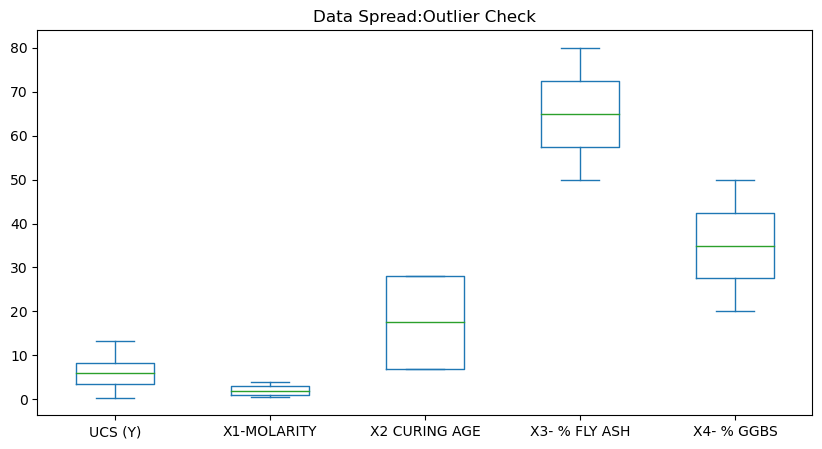

In [183]:
df.plot(kind="box",figsize=(10,5))
plt.title("Data Spread:Outlier Check")

In [184]:
y=np.array(df["UCS (Y)"])

<IPython.core.display.Javascript object>

In [185]:
y

array([ 0.704    ,  0.74     ,  0.97     ,  0.9      ,  1.02     ,
        1.089    ,  1.37     ,  1.27     ,  3.115    ,  3.22     ,
        3.85     ,  3.185    ,  5.12     ,  4.83     ,  5.65     ,
        4.92     ,  5.859    ,  5.967    ,  5.913    ,  6.048    ,
        7.34     ,  7.61     ,  7.55     ,  7.36     ,  5.859    ,
        5.967    ,  5.913    ,  6.048    ,  8.34     ,  8.18     ,
        8.67     ,  8.78     ,  7.5374   ,  6.1854   ,  7.436    ,
        7.4022   , 10.75     ,  9.84     , 10.3075   , 10.18     ,
        1.135    ,  1.154    ,  0.938    ,  0.943    ,  1.88     ,
        1.77     ,  1.4652   ,  1.39     ,  4.3605   ,  5.15375  ,
        4.30825  ,  5.30575  ,  8.24     ,  9.16     ,  7.27414  ,
        8.75     ,  5.7748   ,  4.4116   ,  5.8529   ,  4.5252   ,
       11.24     ,  9.81     ,  8.83     ,  8.714896 ,  5.9337   ,
        6.2199   ,  6.58     ,  6.104625 , 10.52     , 10.64     ,
       10.94     , 11.08     ,  9.       ,  8.84     ,  9.17  

In [186]:
df.head()

,UCS (Y),X1-MOLARITY,X2 CURING AGE,X3- % FLY ASH,X4- % GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20


In [187]:
df = df.rename(columns={'X1-MOLARITY':'MOLARITY',
                        'X2 CURING AGE':'CURING AGE',
                        'X3- % FLY ASH':'FLY ASH',
                        'X4- % GGBS':'GGBS',
                        'UCS (Y)':'UCS'
})

In [188]:
df.head()

,UCS,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UCS         160 non-null    float64
 1   MOLARITY    160 non-null    float64
 2   CURING AGE  160 non-null    int64  
 3   FLY ASH     160 non-null    int64  
 4   GGBS        160 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 6.4 KB


In [190]:
df.shape

(160, 5)

In [191]:
df.isnull().sum()

UCS           0
MOLARITY      0
CURING AGE    0
FLY ASH       0
GGBS          0
dtype: int64

no null entries

In [192]:
df.describe()

,UCS,MOLARITY,CURING AGE,FLY ASH,GGBS
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,5.847119,2.100000,17.500000,65.000000,35.000000
std,3.356887,1.284646,10.532967,11.215443,11.215443
min,0.353400,0.500000,7.000000,50.000000,20.000000
25%,3.591518,1.000000,7.000000,57.500000,27.500000
50%,5.911500,2.000000,17.500000,65.000000,35.000000
75%,8.265000,3.000000,28.000000,72.500000,42.500000
max,13.260000,4.000000,28.000000,80.000000,50.000000


## Exploratory Data Analysis 

## Molarity

In [193]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['MOLARITY'].quantile(q=0.25)
Q3=df['MOLARITY'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['MOLARITY']))

1st Quartile (Q1) is:  1.0
3rd Quartile (Q3) is:  3.0
Interquartile range (IQR) is  2.0


<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x2c702e382b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c702e380d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c702e38ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c70410ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c70410e170>],
 'means': []}

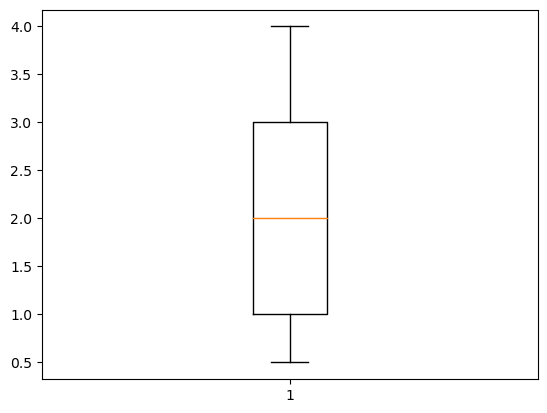

In [194]:
plt.boxplot(df["MOLARITY"])

In [195]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -2.0
Upper outlier limit in cement:  6.0


In [196]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Molarity upper: ', df[df['MOLARITY']>6.0]['MOLARITY'].count())
print('Number of outliers in Molarity lower: ', df[df['MOLARITY']<-2.0]['MOLARITY'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in Molarity upper:  0
Number of outliers in Molarity lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_2756\1542525641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY']).set_title('MOLARITY')


<IPython.core.display.Javascript object>

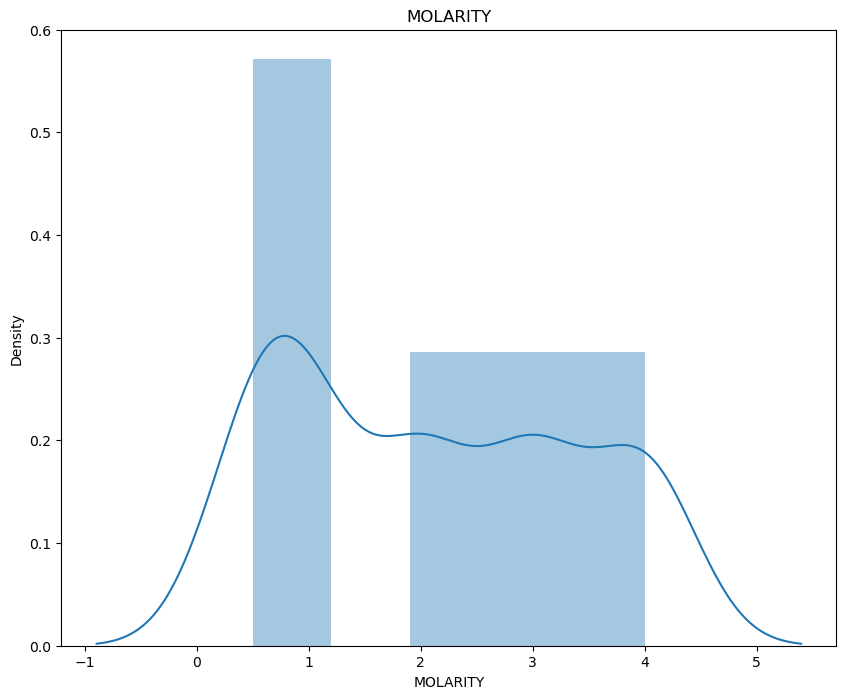

In [197]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY']).set_title('MOLARITY')
plt.show()

## CURING AGE

In [198]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['CURING AGE'].quantile(q=0.25)
Q3=df['CURING AGE'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['CURING AGE']))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  28.0
Interquartile range (IQR) is  21.0


<IPython.core.display.Javascript object>

<Axes: >

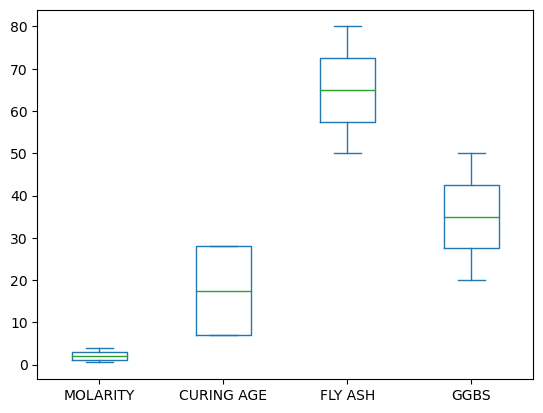

In [199]:
df1=pd.DataFrame(df,columns=["MOLARITY","CURING AGE","FLY ASH","GGBS"])
df1.plot(kind="box")

Thus we see no outliers exist in the data

# Checking Data Distribution 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_2756\173142493.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY'])


<IPython.core.display.Javascript object>

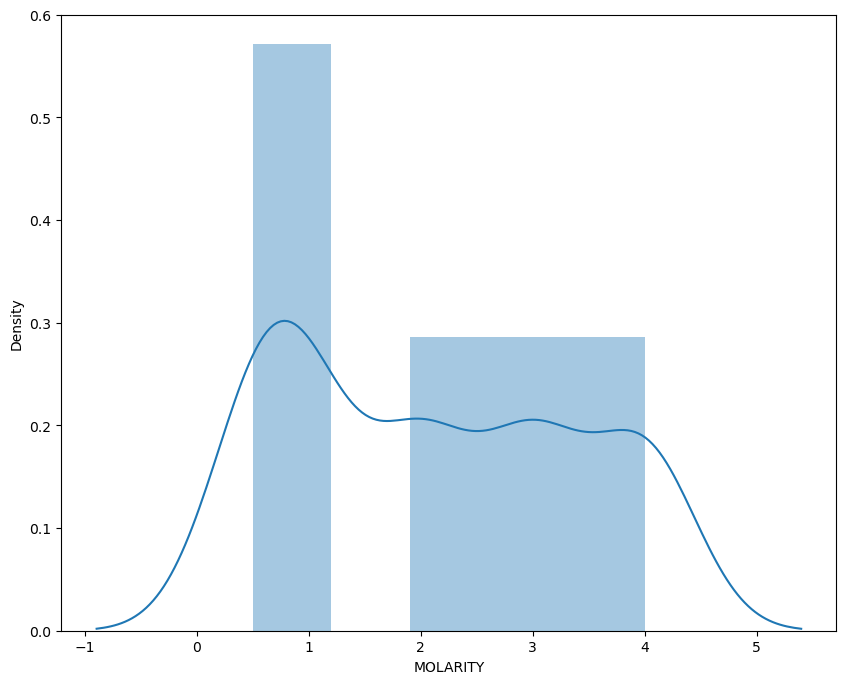

In [200]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_2756\4072669076.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CURING AGE'])


<IPython.core.display.Javascript object>

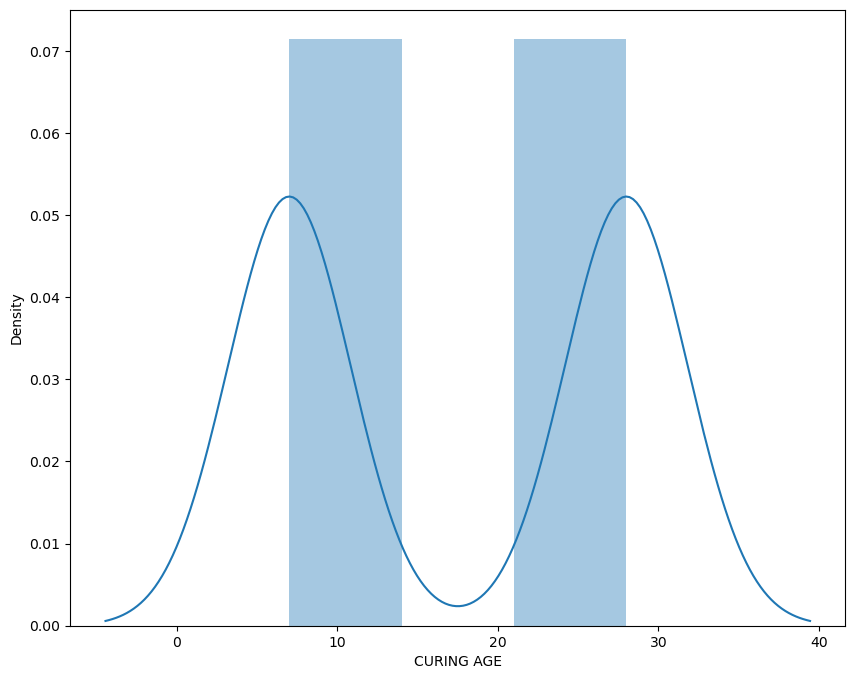

In [201]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['CURING AGE'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_2756\2056115471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FLY ASH'])


<IPython.core.display.Javascript object>

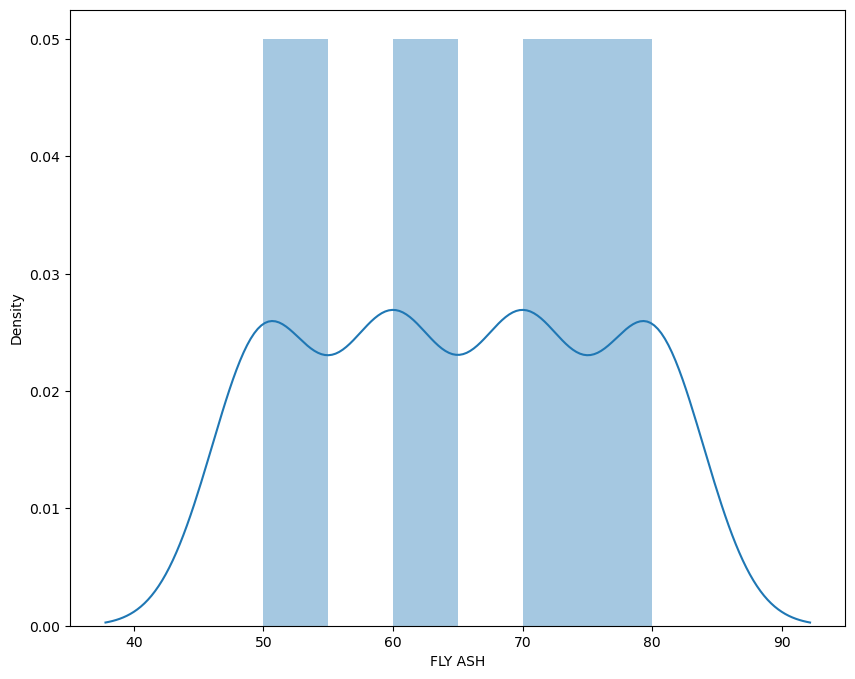

In [202]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['FLY ASH'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_2756\1052900917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GGBS'])


<IPython.core.display.Javascript object>

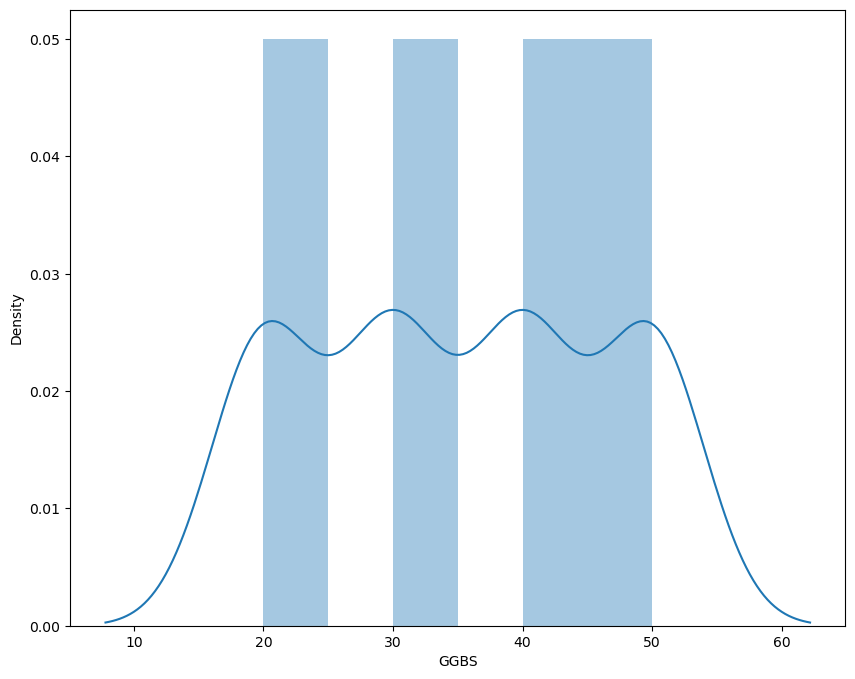

In [203]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['GGBS'])
plt.show()

<IPython.core.display.Javascript object>

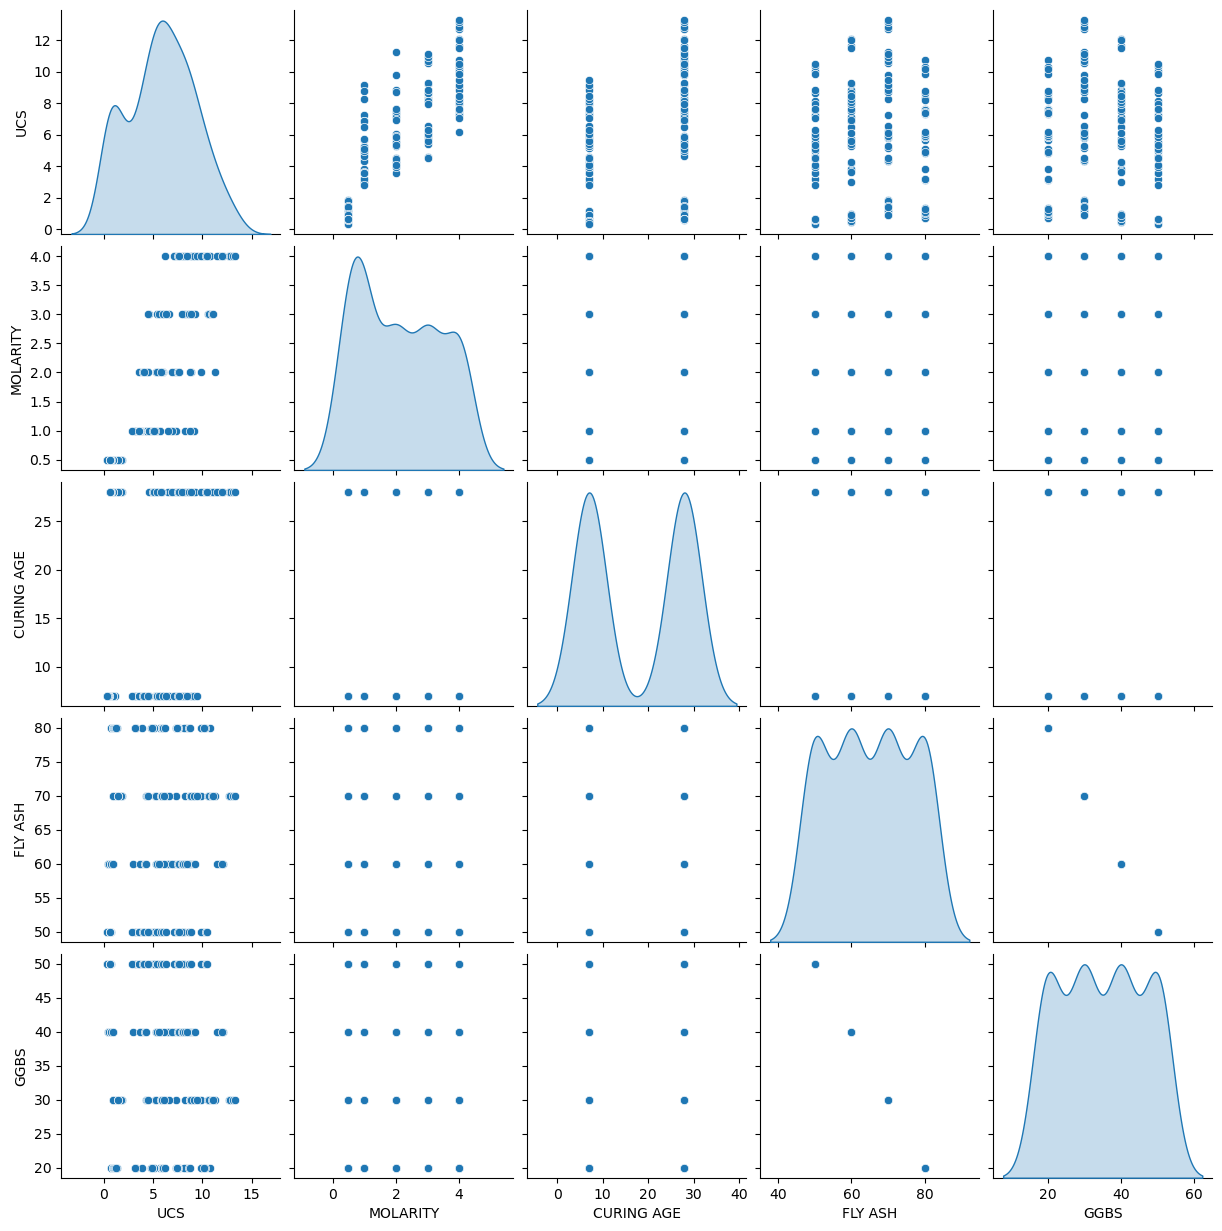

In [204]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

<IPython.core.display.Javascript object>

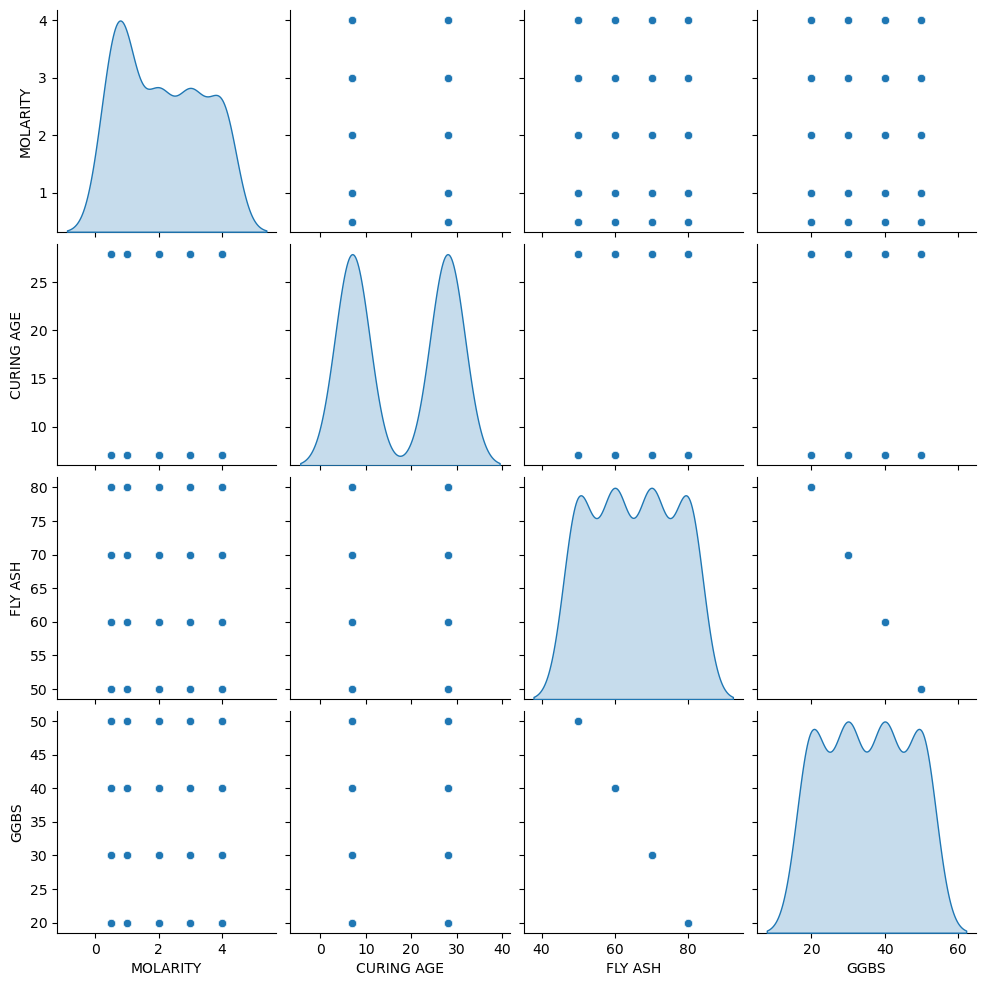

In [205]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df1, diag_kind='kde')

There seems to be a linear relationship between GGBS and FLY ASH while other parameters are independent of each other. Also the parameters seem to assume particular values only rather than being randomly scattered

## Correlation between variables 

In [206]:
sns.set_context("poster",font_scale=.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

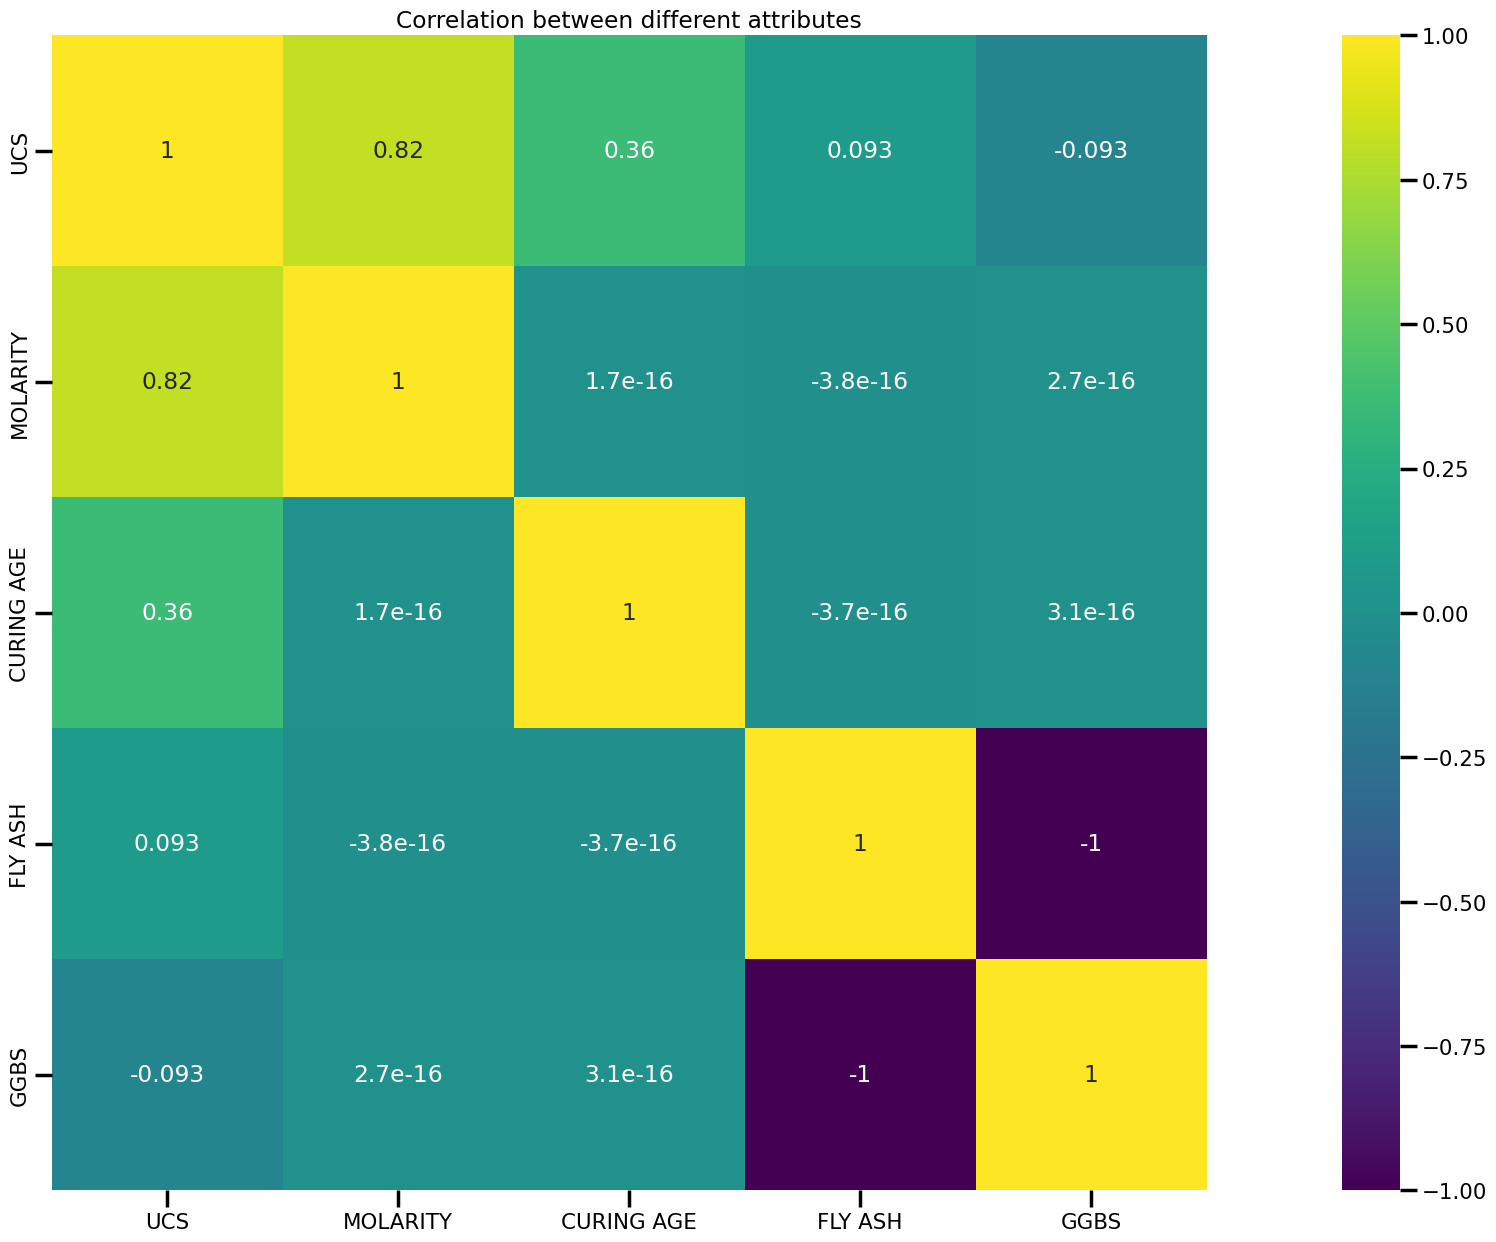

In [207]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

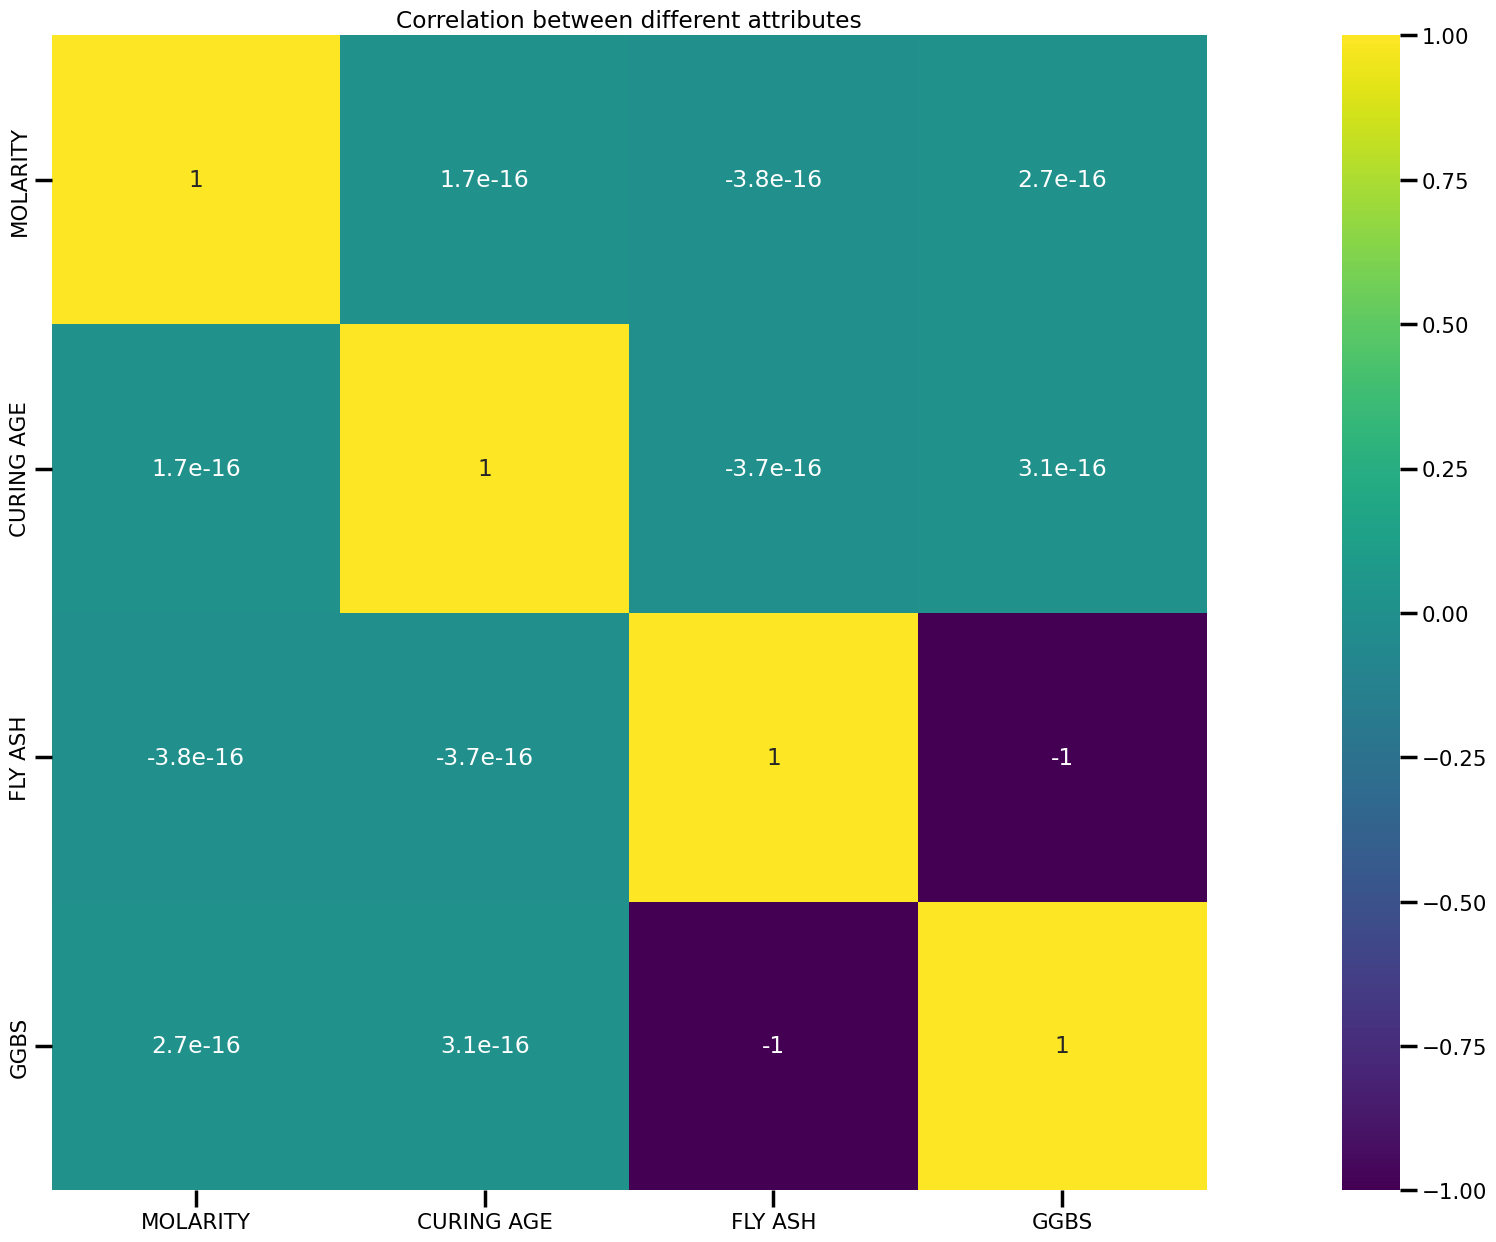

In [208]:
plt.figure(figsize=(35,15))

sns.heatmap(df1.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Thus we have verified our findings.
As GGBS and FLY ASH are perfectly correlated, we can drop one of them, hence lets drop GGBS

In [209]:
X = df.drop(columns=["UCS","GGBS"], axis = 1)
y = df['UCS']

In [210]:
X

,MOLARITY,CURING AGE,FLY ASH
0,0.5,7,80
1,0.5,7,80
2,0.5,7,80
3,0.5,7,80
4,0.5,28,80
...,...,...,...
155,4.0,7,50
156,4.0,28,50
157,4.0,28,50
158,4.0,28,50


In [211]:
y

0       0.704
1       0.740
2       0.970
3       0.900
4       1.020
        ...  
155     7.620
156    10.060
157     9.870
158    10.370
159    10.480
Name: UCS, Length: 160, dtype: float64

# Predictive Modelling 

In [212]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [213]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

### Random Forest 

In [214]:
#100 n_estimators or tress by default
model=RandomForestRegressor()
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [215]:
y_pred=model.predict(X_test)

In [216]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.9912799176882295

In [217]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.9551484715206602

In [218]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.9551484715206602

In [219]:
data = {'Algorithm': 'Random Forest', 'accuracy': acc_R}
data

{'Algorithm': 'Random Forest', 'accuracy': 0.9551484715206602}

In [220]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame(({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]}),index=['1'])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148


### KFold Cross Validation

In [221]:
#we can use stratified k_fold as well
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
K_results=cross_val_score(model,X,y,cv=kfold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [222]:
K_results

array([0.93703431, 0.97478336, 0.95221013, 0.98130917, 0.97457483,
       0.98668663, 0.96433214, 0.9951652 , 0.98556105, 0.96942991])

In [223]:
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

0.9721086725274205

In [224]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=['2'])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109


## Gradient Boost Regressor 

In [225]:
model=GradientBoostingRegressor()

<IPython.core.display.Javascript object>

In [226]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [227]:
y_pred=model.predict(X_test)

In [228]:
df_gbpred=pd.DataFrame(y_pred)

<IPython.core.display.Javascript object>

In [229]:
arr=np.array(df_gbpred.index)

<IPython.core.display.Javascript object>

In [230]:
arr.shape

(48,)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'GB Model:Training Dataset')

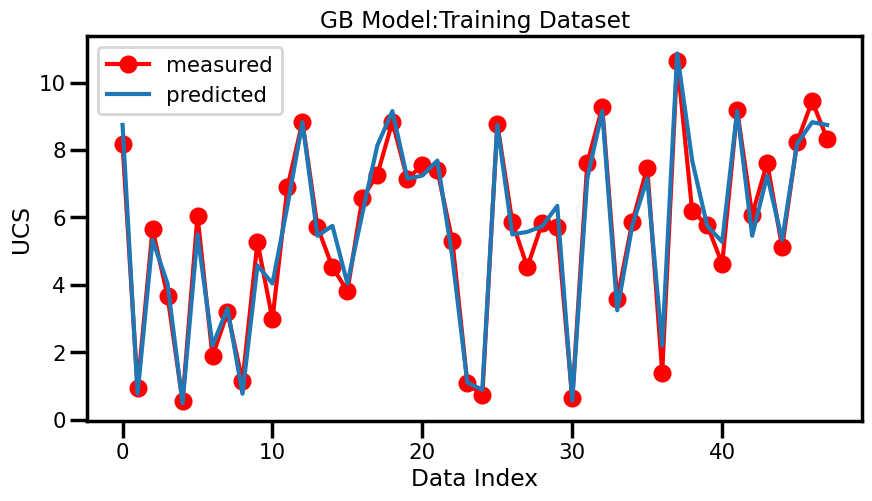

In [231]:
fig=plt.figure(figsize=(10,5))
plt.plot(arr,y_test,"r-o",label="measured")
plt.plot(arr,y_pred,label="predicted")
plt.legend()
plt.xlabel("Data Index")
plt.ylabel("UCS")
plt.title("GB Model:Training Dataset")

In [232]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9880720855465874

In [233]:
#Model performance on Test Data
acc_G=model.score(X_test,y_test)
acc_G

0.9625399171565944

In [234]:
gradient_re=pd.DataFrame({'Algorithm':'Gradient Boost Regressor','accuracy':acc_G},index=['3'])
results=pd.concat([results,gradient_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540


In [235]:
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
results_3=cross_val_score(model,X,y,cv=kfold)
results_3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.95832757, 0.96603836, 0.93501696, 0.98412678, 0.98295718,
       0.98276085, 0.97477369, 0.99263024, 0.98672569, 0.96449488])

In [236]:
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

0.9727852216575599

In [237]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=['4'])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785


#### Making function to get score and k_fold score 

In [238]:
def get_score(model):
    model.fit(X_train,y_train)
    print("model score on train data:",model.score(X_train,y_train))
    print("model score on test data:",model.score(X_test,y_test))
    model_score=model.score(X_test,y_test)
    return model_score

In [239]:
# def add_to_df(model_name,model_score,index,results=results):
#     acc=pd.DataFrame({'Algorithms':[str(model_name)],"accuracy":model_score},index=[str(index)])
#     results=pd.concat([results,acc])    
#     results = results[['Algorithm','accuracy']]
#     display(results)

In [240]:
def get_kfold_score(model):
    k=10
    kfold=KFold(n_splits=k,random_state=70,shuffle=True)
    results_4=cross_val_score(model,X,y,cv=kfold)
    print(results_4)
    accuracy=np.mean(results_4)
    print("kfold accuracy:",accuracy)
    return accuracy

## Ada Boost 

In [241]:
from sklearn.ensemble import AdaBoostRegressor

In [242]:
model_score=get_score(AdaBoostRegressor())

model score on train data: 0.9488603799143341
model score on test data: 0.910255274638286


In [243]:
kfold_score=get_kfold_score(AdaBoostRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.88727146 0.89958522 0.8791657  0.91928082 0.93530703 0.92131503
 0.9057024  0.93997815 0.96909955 0.90811728]


<IPython.core.display.Javascript object>

kfold accuracy: 0.916482264467197


In [244]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': model_score},index=['5'])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255


In [245]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': kfold_score},index=['6'])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482


## KNN Regressor 

In [246]:
X.shape

(160, 3)

In [247]:
#checking for the best k
from sklearn.neighbors import KNeighborsRegressor

acc_k=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    acc_k.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

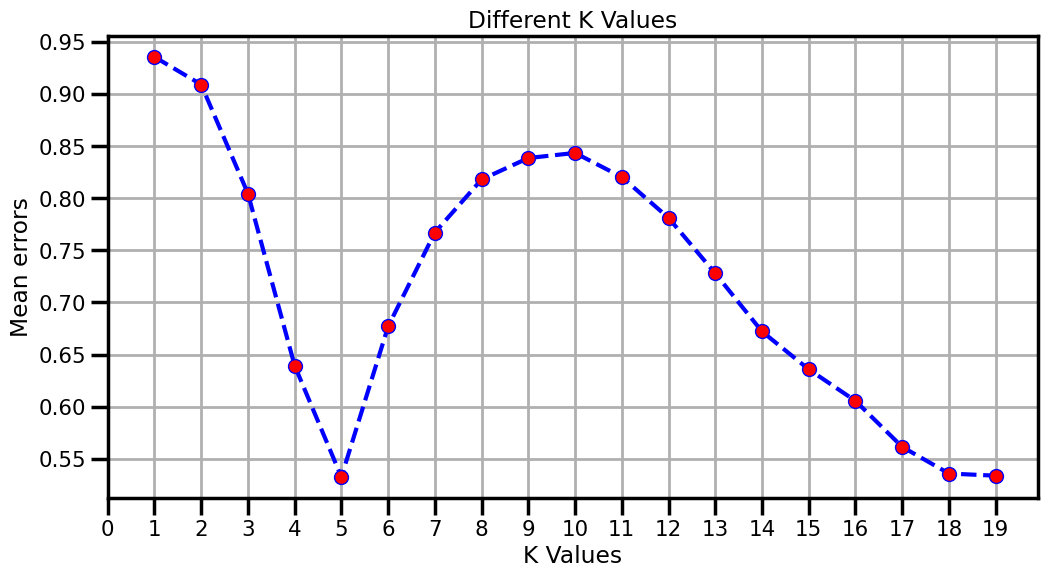

In [248]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),acc_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid()
plt.xticks(np.arange(0,20))
# plt.yticks(np.arange(0,2,.1))
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

2 seems a good choice for k

In [249]:
model_score=get_score(KNeighborsRegressor(n_neighbors=2))

model score on train data: 0.9862063177307566
model score on test data: 0.9091303749393838


In [250]:
kfold_score=get_kfold_score(KNeighborsRegressor(n_neighbors=2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.93407556 0.95189461 0.93719509 0.98225986 0.98203676 0.98045901
 0.95352134 0.96686637 0.97363042 0.97390133]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9635840351948748


In [251]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [model_score]}, index=['7'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130


In [252]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': kfold_score},index=['8'])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584


## Bagging Regressor 

In [253]:
from sklearn.ensemble import BaggingRegressor

In [254]:
model_score=get_score(BaggingRegressor())

model score on train data: 0.989975859201797
model score on test data: 0.9562183622148727


In [255]:
kfold_score=get_kfold_score(BaggingRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.9362461  0.97979141 0.93832895 0.9799468  0.97730803 0.98597947
 0.96343811 0.99371764 0.98273138 0.96766681]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9705154686019626


In [256]:
Bagging_df=pd.DataFrame({"Algorithm":"Bagging Regressor","accuracy":model_score},index=['9'])
results=pd.concat([results,Bagging_df])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218


In [257]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=['10'])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


## Support Vector Regressor 

In [258]:
from sklearn.svm import SVR
model=SVR(kernel="linear")

In [259]:
model_score=get_score(model)

model score on train data: 0.8238519322466914
model score on test data: 0.7071407972668804


In [260]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.5339572  0.67096974 0.61272539 0.85498858 0.8719271  0.7486613
 0.68546589 0.8834874  0.84460138 0.73275947]


<IPython.core.display.Javascript object>

kfold accuracy: 0.7439543451227706


In [261]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor','Support Vector Regressor k fold'], 'accuracy':[model_score,kfold_score]},index=['11','12'])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


## XGBoost Regressor 

In [262]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [263]:
xgr=XGBRegressor()

In [264]:
model_score=get_score(xgr)

model score on train data: 0.9922719622472523
model score on test data: 0.9536902579138719


In [265]:
kfold_score=get_kfold_score(xgr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.93184109 0.97678643 0.95416912 0.98219864 0.98217347 0.98773244
 0.96517683 0.9956199  0.98078608 0.9716894 ]


<IPython.core.display.Javascript object>

kfold accuracy: 0.9728173387756804


In [266]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor','XGBoost Regressor k_fold'], 'accuracy': [model_score,kfold_score]},index=['13','14'])
results = pd.concat([results, XGB_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


## Decision Tree Regressor 

In [267]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [268]:
print('Feature Importance: \n',pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns]))

<IPython.core.display.Javascript object>

Feature Importance: 
             Importance
MOLARITY      0.789675
CURING AGE    0.140015
FLY ASH       0.070310


In [269]:
df_featureimp=pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

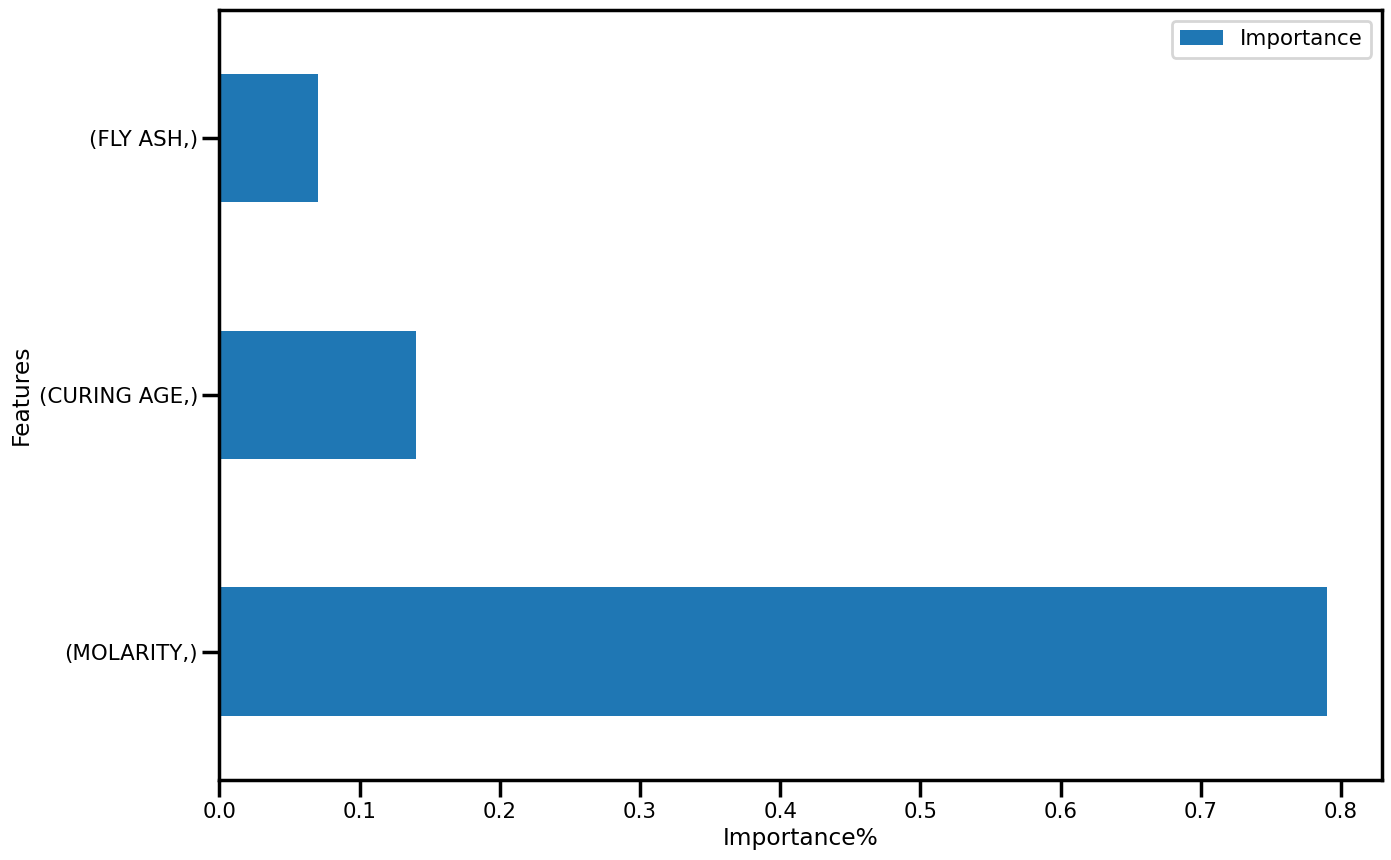

In [270]:
df_featureimp.plot(kind="barh",figsize=(15,10))
plt.xlabel("Importance%")
plt.ylabel("Features")
plt.yticks=[X_train.columns]

Thus we can observe that <b>MOLARITY</b> is the most import feature in prediction

In [271]:
model_score=model.score(X_test,y_test)
model_score

0.9535251277613314

In [272]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.93175567 0.97698059 0.95423265 0.9821871  0.98201572 0.98774545
 0.96511082 0.9956399  0.98071052 0.97168539]


<IPython.core.display.Javascript object>

kfold accuracy: 0.972806381510772


In [273]:
DT_df=pd.DataFrame({'Algorithm':['Decision Tree Regressor 1','Decision Tree Regressor 1 k_fold'],'accuracy':[model_score,kfold_score]},index=['15','16'])
results=pd.concat([results,DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


# Feature Selection

In [274]:
df

,UCS,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20
...,...,...,...,...,...
155,7.620,4.0,7,50,50
156,10.060,4.0,28,50,50
157,9.870,4.0,28,50,50
158,10.370,4.0,28,50,50


In [275]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [276]:
X1 = df2.drop(['UCS','FLY ASH','GGBS'],axis=1)
y1 = df2['UCS']
#Split the X1 and y1 into training and test set in 70:30 ratio
X1_train,X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [277]:
X1_train = X1_train.apply(zscore)
X1_test = X1_test.apply(zscore)

## Decision Tree Regressor 2

In [278]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [279]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X1_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
             Importance
MOLARITY      0.849134
CURING AGE    0.150866


In [280]:
model_score=decNew_Model.score(X1_train, y1_train)
model_score

0.9206665608910506

In [281]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': model_score},index=['17'])
results = pd.concat([results, DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


In [282]:
k = 10

kfold = KFold(n_splits=k, random_state=70,shuffle= True)
results_9 = cross_val_score(decNew_Model, X1, y1, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.8876846578294906

In [283]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2 k_fold'], 'accuracy': accuracy},index=['18'])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


## Pruned Decision Tree Regressor 

In [284]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)

In [285]:
model_score=get_score(dec_prun_model)

model score on train data: 0.9145971582521915
model score on test data: 0.8599145308304871


In [286]:
kfold_score=get_kfold_score(dec_prun_model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.84816934 0.8698268  0.84993658 0.92063026 0.88746478 0.93910823
 0.85554137 0.93211775 0.92363967 0.88007145]


<IPython.core.display.Javascript object>

kfold accuracy: 0.8906506229167652


In [287]:
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [288]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
             Importance
MOLARITY      0.845604
CURING AGE    0.151906
FLY ASH       0.002490


### Plotting the Decision Tree 

In [289]:
!pip install graphviz

In [290]:
!pip install pydot

In [291]:
!pip install six

In [292]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [293]:
Xscaled2_df=Xscaled_df.drop(['UCS','GGBS'],axis=1)
feature_cols = Xscaled2_df.columns

In [294]:
feature_cols

Index(['MOLARITY', 'CURING AGE', 'FLY ASH'], dtype='object')

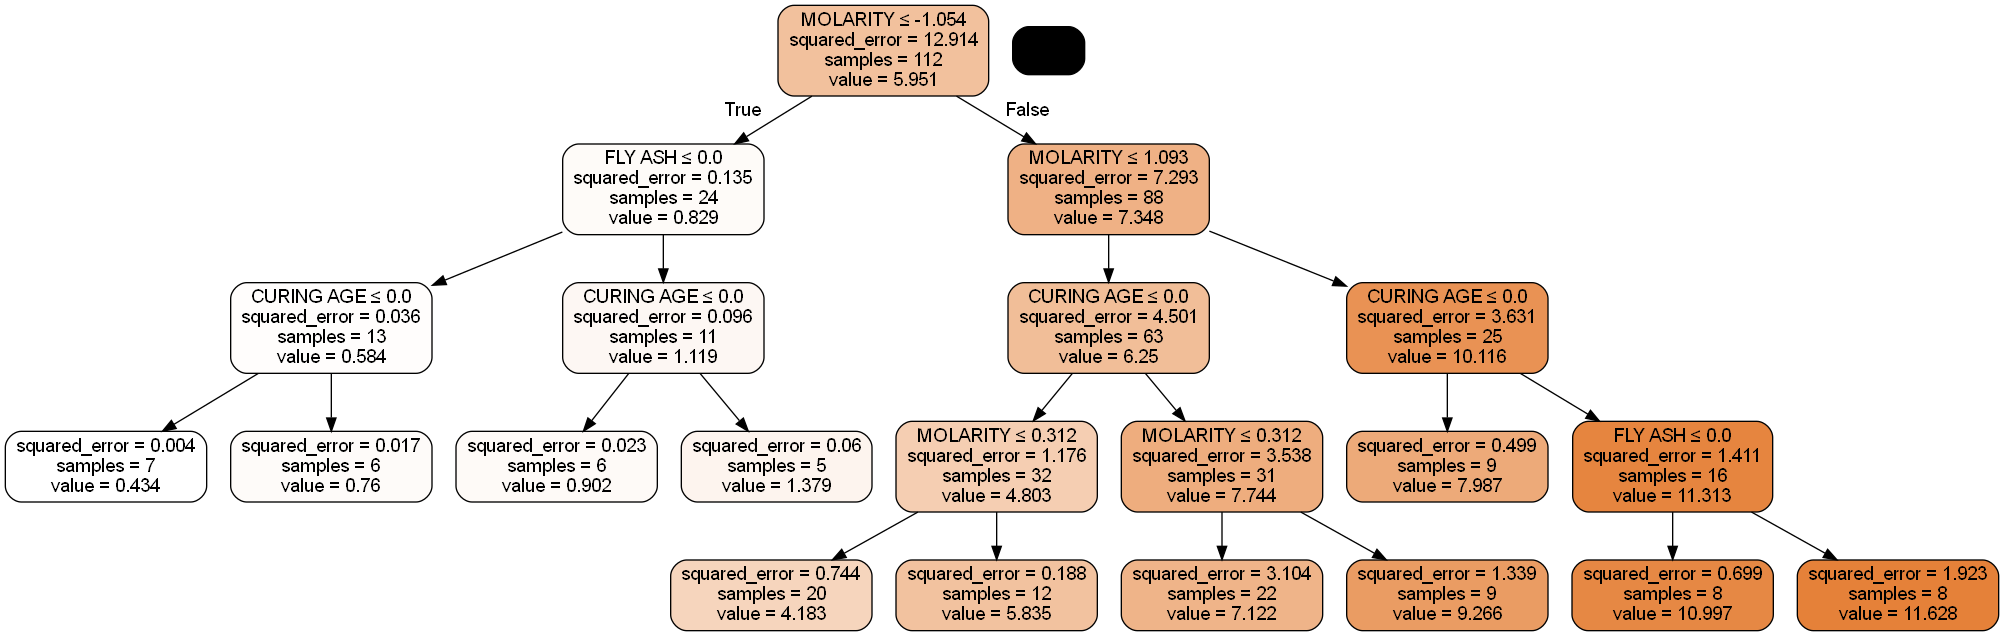

In [295]:
dot_data=StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,
               feature_names=feature_cols,class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('UCS_pruned.png')
Image(graph.create_png())

In [296]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree','Pruned Decision Tree k_fold'], 'accuracy': [model_score,kfold_score]},index=['19','20'])
results = pd.concat([results, DecT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


<b>Random Forest Regressor, KNN Regressor, Gradient Boost Regressor, Bagging Regressor, XGBoost Regressor, Decision Tree Regressor1 (i.e. over every feature)</b> are the best models for modelling UCS. We can work with either of them. 

# Regression using ANN 

## Hyperparameter Tuning

In [297]:
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test)
           
            y_pred=np.array(y_pred[:][:])
            y_test=np.reshape(y_test,(-1,1))
            err=abs(y_test-y_pred)
            err/=y_test
            MAPE=np.mean(err)*100
#             MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData,pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 43.053104732199465
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 49.18331660281967
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 77.33857669924016
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 90.00374592774338
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 34.940790610037325
2/2 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 45.022758838859204
2/2 [==============================] - 0s 4ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 56.29330300657423
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 72.82542230466416
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 26.328448055209023
2/2 [==============================] - 0s 5ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 34.061787833094826
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 57.305093978290245
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 67.73346833247192
2/2 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 18.710220233236598
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 32.342706615967714
2/2 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 51.01010692580932
2/2 [==============================] - 0s 0s/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 60.36747575759267


### Choosing best parameters

We can even use <b>keras tuner</b> to optimise the no. of hidden layers and learning rate

<Axes: xlabel='Parameters'>

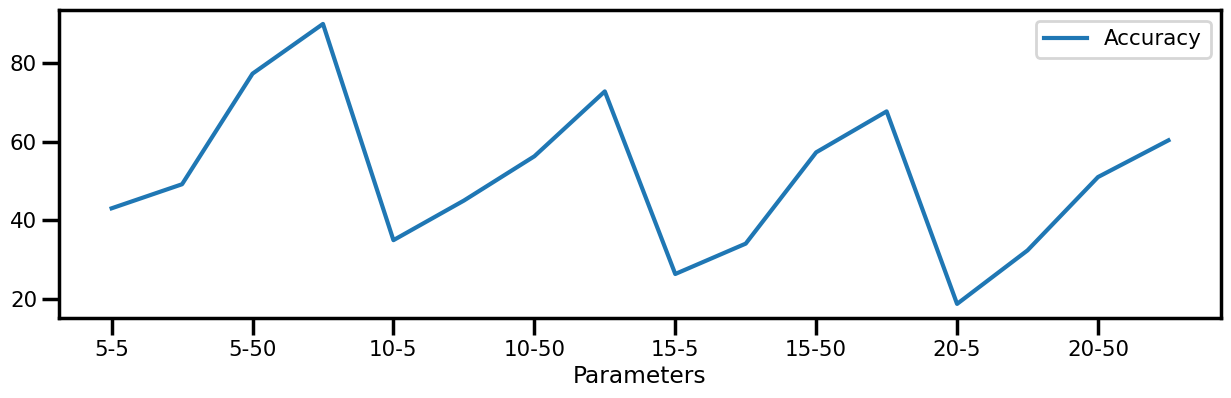

In [298]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Regressor with optimized parameters 

In [299]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=128,kernel_initializer="normal",activation="relu"))
model.add(Dense(units=64,kernel_initializer="normal",activation="tanh"))
model.add(Dense(1,kernel_initializer="normal"))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,batch_size=8,epochs=40,verbose=1)

Epoch 1/40
14/14 [==============================] - 1s 2ms/step - loss: 47.0339
Epoch 2/40
14/14 [==============================] - 0s 2ms/step - loss: 42.2214
Epoch 3/40
14/14 [==============================] - 0s 3ms/step - loss: 32.4920
Epoch 4/40
14/14 [==============================] - 0s 3ms/step - loss: 19.7483
Epoch 5/40
14/14 [==============================] - 0s 1ms/step - loss: 10.2540
Epoch 6/40
14/14 [==============================] - 0s 1ms/step - loss: 6.8135
Epoch 7/40
14/14 [==============================] - 0s 3ms/step - loss: 5.3591
Epoch 8/40
14/14 [==============================] - 0s 2ms/step - loss: 4.3344
Epoch 9/40
14/14 [==============================] - 0s 3ms/step - loss: 3.7097
Epoch 10/40
14/14 [==============================] - 0s 2ms/step - loss: 3.3652
Epoch 11/40
14/14 [==============================] - 0s 2ms/step - loss: 3.0674
Epoch 12/40
14/14 [==============================] - 0s 3ms/step - loss: 2.8523
Epoch 13/40
14/14 [=========================

In [300]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [301]:
acc_ANN=metrics.r2_score(y_test,y_pred)

<IPython.core.display.Javascript object>

In [302]:
acc_ANN

0.7822125458609026

In [303]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

1.5483992362524905

In [304]:
ANN_re = pd.DataFrame({'Algorithm': ['ANN Manually Tuned'], 'accuracy': acc_ANN},index=['21'])
results = pd.concat([results, ANN_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


# Regression with Sklearn ANN or MLP(Multi-Layer Perceptron) 

In [305]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [306]:
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

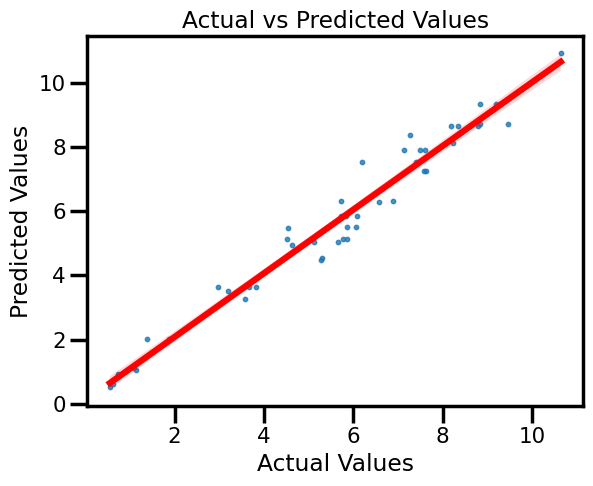

In [307]:
# Predict values for testing set
y_pred = model.predict(X_test)

# Create regression plot with actual and predicted values
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

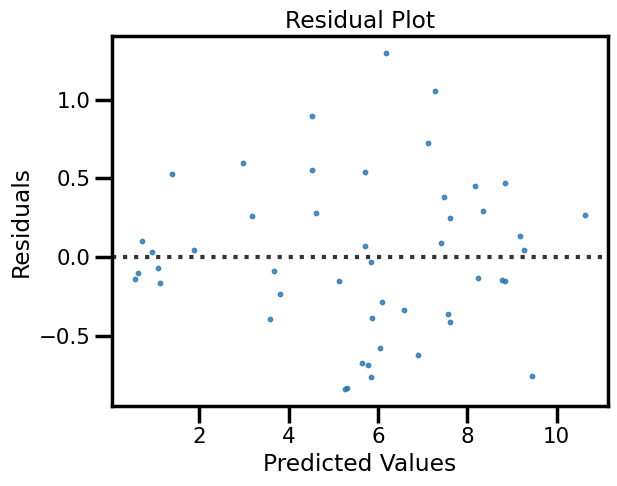

In [308]:
# Create residual plot with actual and predicted values
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [309]:
model_score=model.score(X_test,y_test)
model_score

0.9656800459839494

In [310]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[-0.24030696 -0.33288966  0.74691321  0.94966449  0.93832639  0.94706534
  0.85841651  0.97388483  0.89090165  0.93448438]


<IPython.core.display.Javascript object>

kfold accuracy: 0.6666460177322935


In [311]:
gradient_re = pd.DataFrame({'Algorithm': ['ANN:Scikit-Learn MLP','ANN:Scikit-Learn MLP k_fold'], 'accuracy': [model_score,kfold_score]},index=['22','23'])
results = pd.concat([results, gradient_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


Thus we see that the <b>MLP(ANN)</b> is also performing good on the test data but yields poor kfold accuracy

# Plotting

In [312]:
df

,UCS,MOLARITY,CURING AGE,FLY ASH,GGBS
0,0.704,0.5,7,80,20
1,0.740,0.5,7,80,20
2,0.970,0.5,7,80,20
3,0.900,0.5,7,80,20
4,1.020,0.5,28,80,20
...,...,...,...,...,...
155,7.620,4.0,7,50,50
156,10.060,4.0,28,50,50
157,9.870,4.0,28,50,50
158,10.370,4.0,28,50,50


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'UCS')

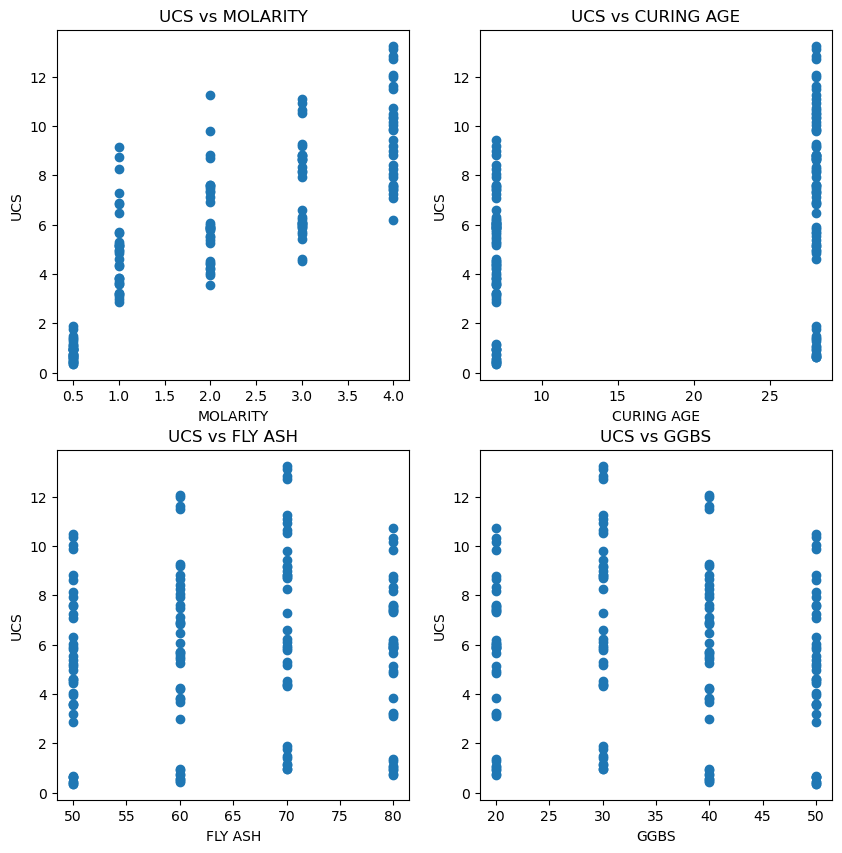

In [313]:
plt.rcdefaults()
fig,ax=plt.subplots(2,2,figsize=(10,10))

ax[0,0].scatter(df["MOLARITY"],df["UCS"])
ax[0,0].set_title("UCS vs MOLARITY")
ax[0,0].set_xlabel("MOLARITY")
ax[0,0].set_ylabel("UCS")

ax[0,1].scatter(df["CURING AGE"],df["UCS"])
ax[0,1].set_title("UCS vs CURING AGE")
ax[0,1].set_xlabel("CURING AGE")
ax[0,1].set_ylabel("UCS")

ax[1,1].scatter(df["GGBS"],df["UCS"])
ax[1,1].set_title("UCS vs GGBS")
ax[1,1].set_xlabel("GGBS")
ax[1,1].set_ylabel("UCS")

ax[1,0].scatter(df["FLY ASH"],df["UCS"])
ax[1,0].set_title("UCS vs FLY ASH")
ax[1,0].set_xlabel("FLY ASH")
ax[1,0].set_ylabel("UCS")

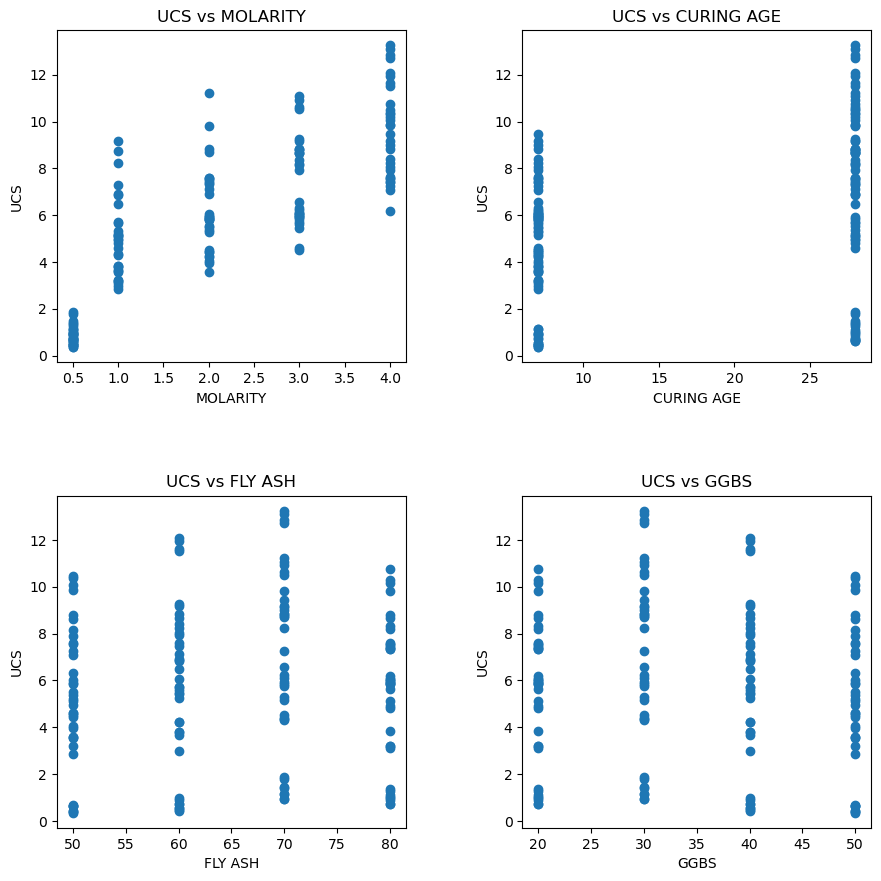

In [314]:
fig.tight_layout(pad=5)
fig

## Actual vs Prediction Plots

In [315]:
import matplotlib.pyplot as plt
plt.rcdefaults()

SMALL_SIZE = 22
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Type 1 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

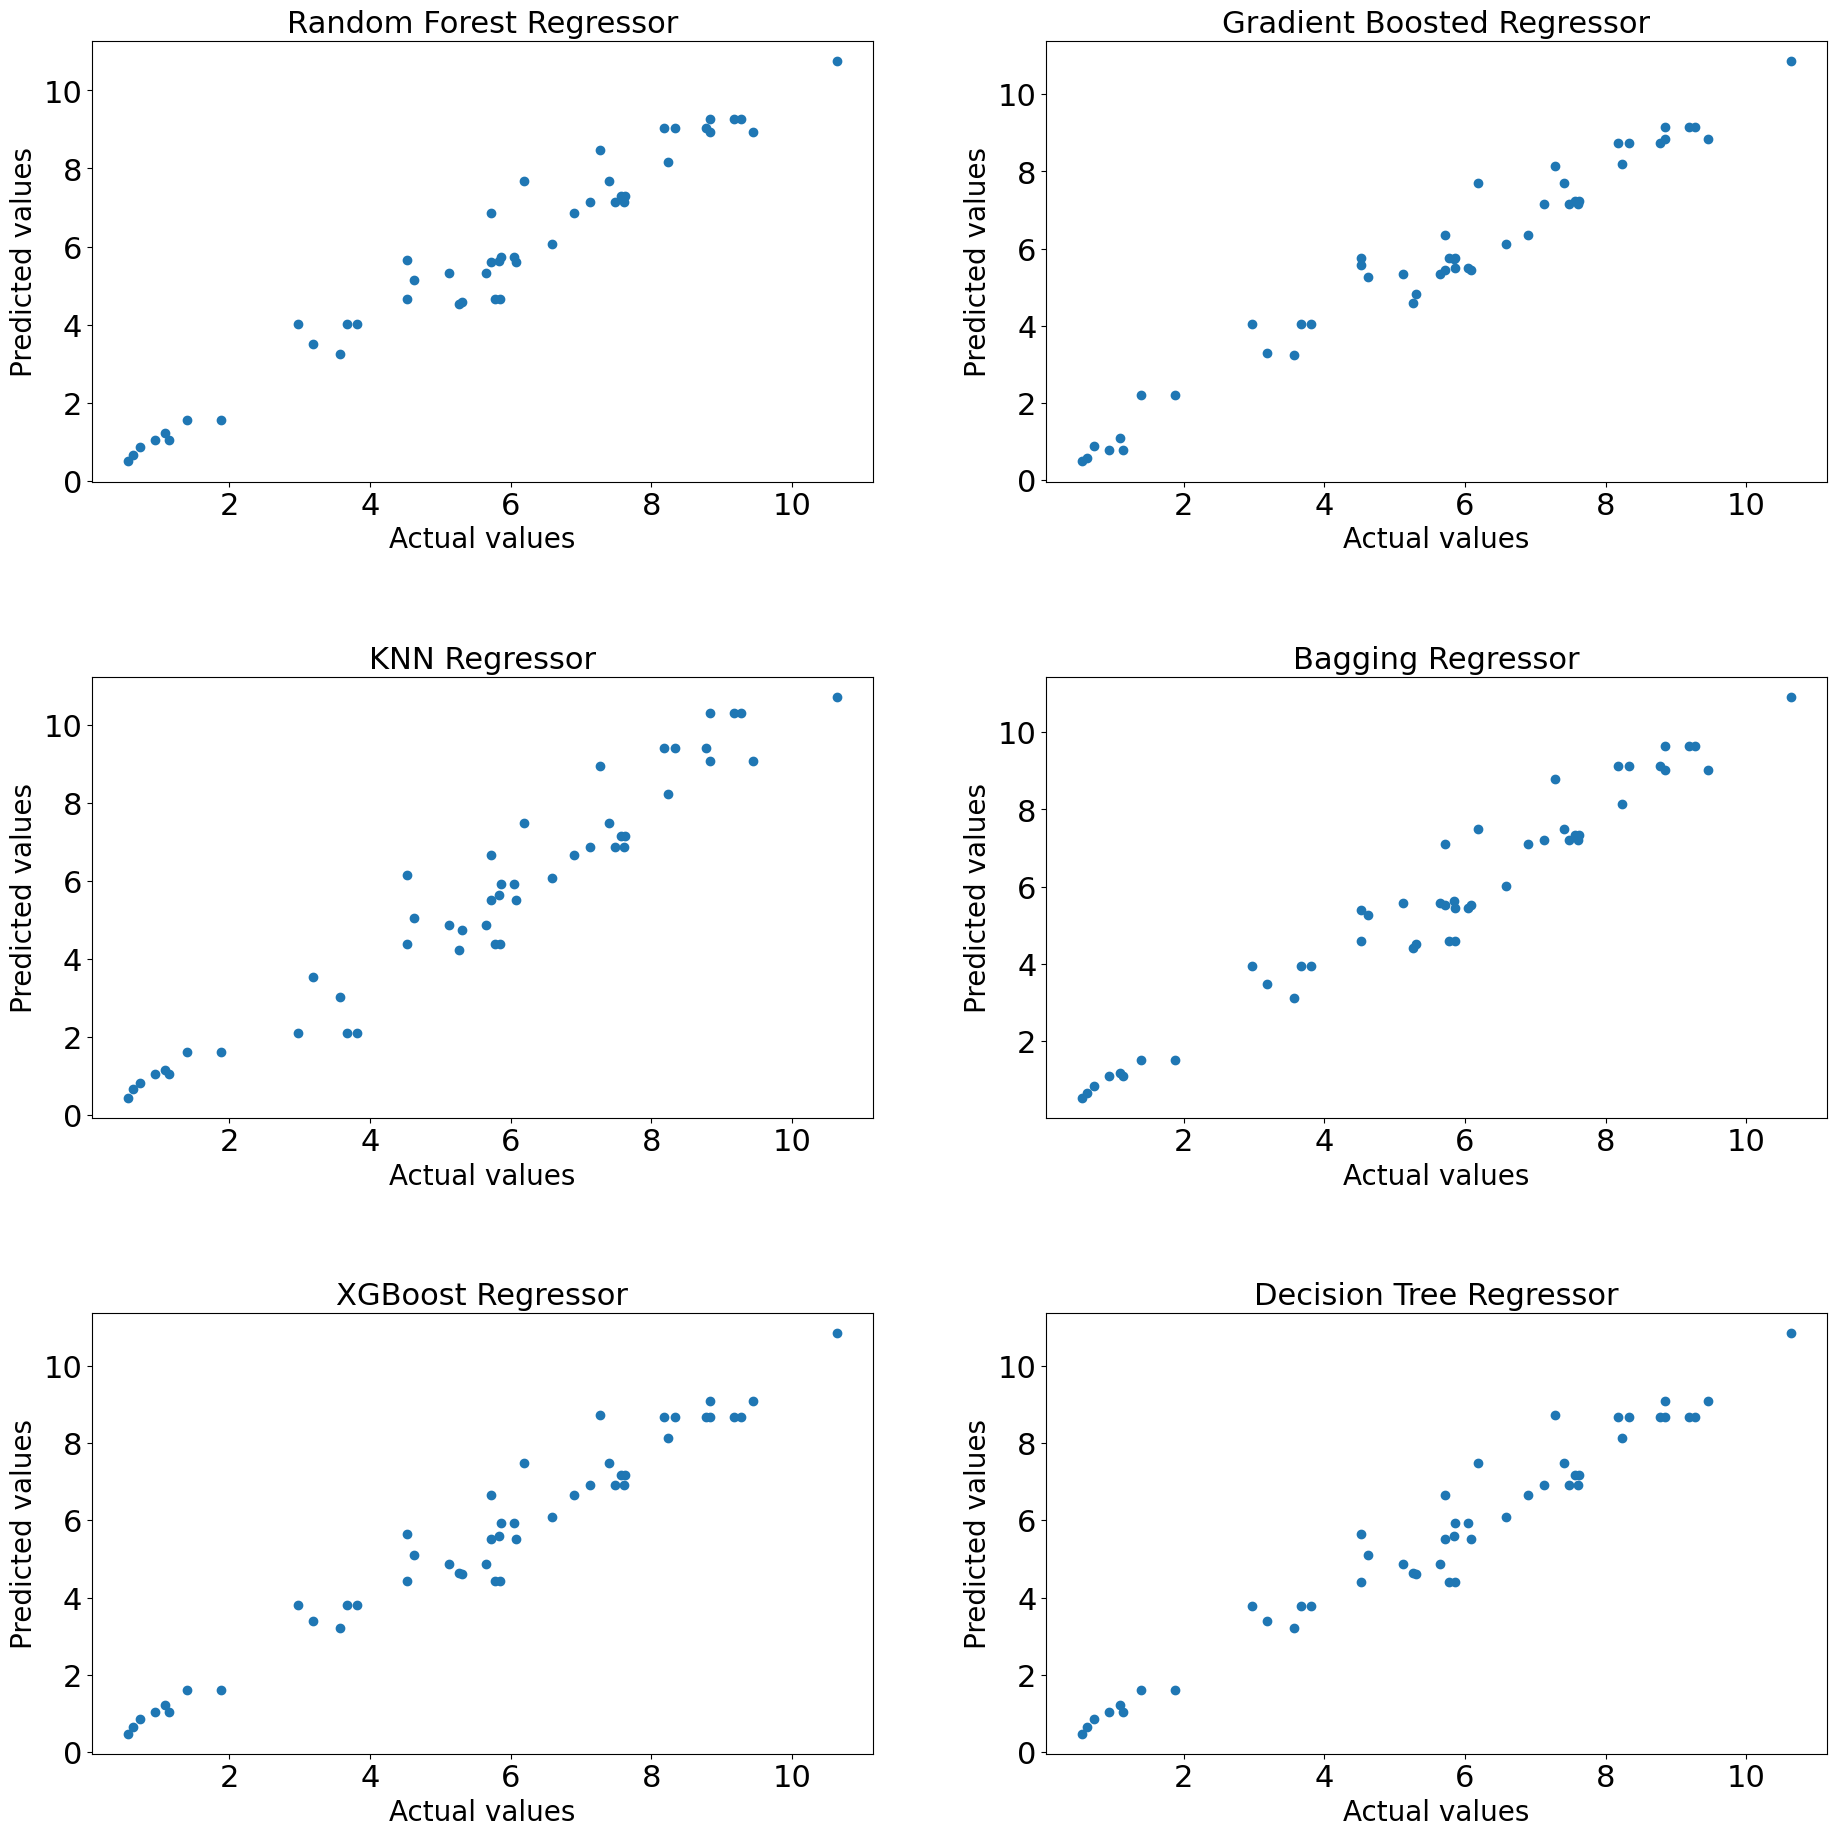

In [316]:
plt.clf()
fig,ax=plt.subplots(3,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ax[0,0].scatter(y_test,y_pred)
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
ax[0,1].scatter(y_test,y_pred)
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[1,0].scatter(y_test,y_pred)
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,1].scatter(y_test,y_pred)
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[2,0].scatter(y_test,y_pred)
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[2,1].scatter(y_test,y_pred)
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)


## Plot type 2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

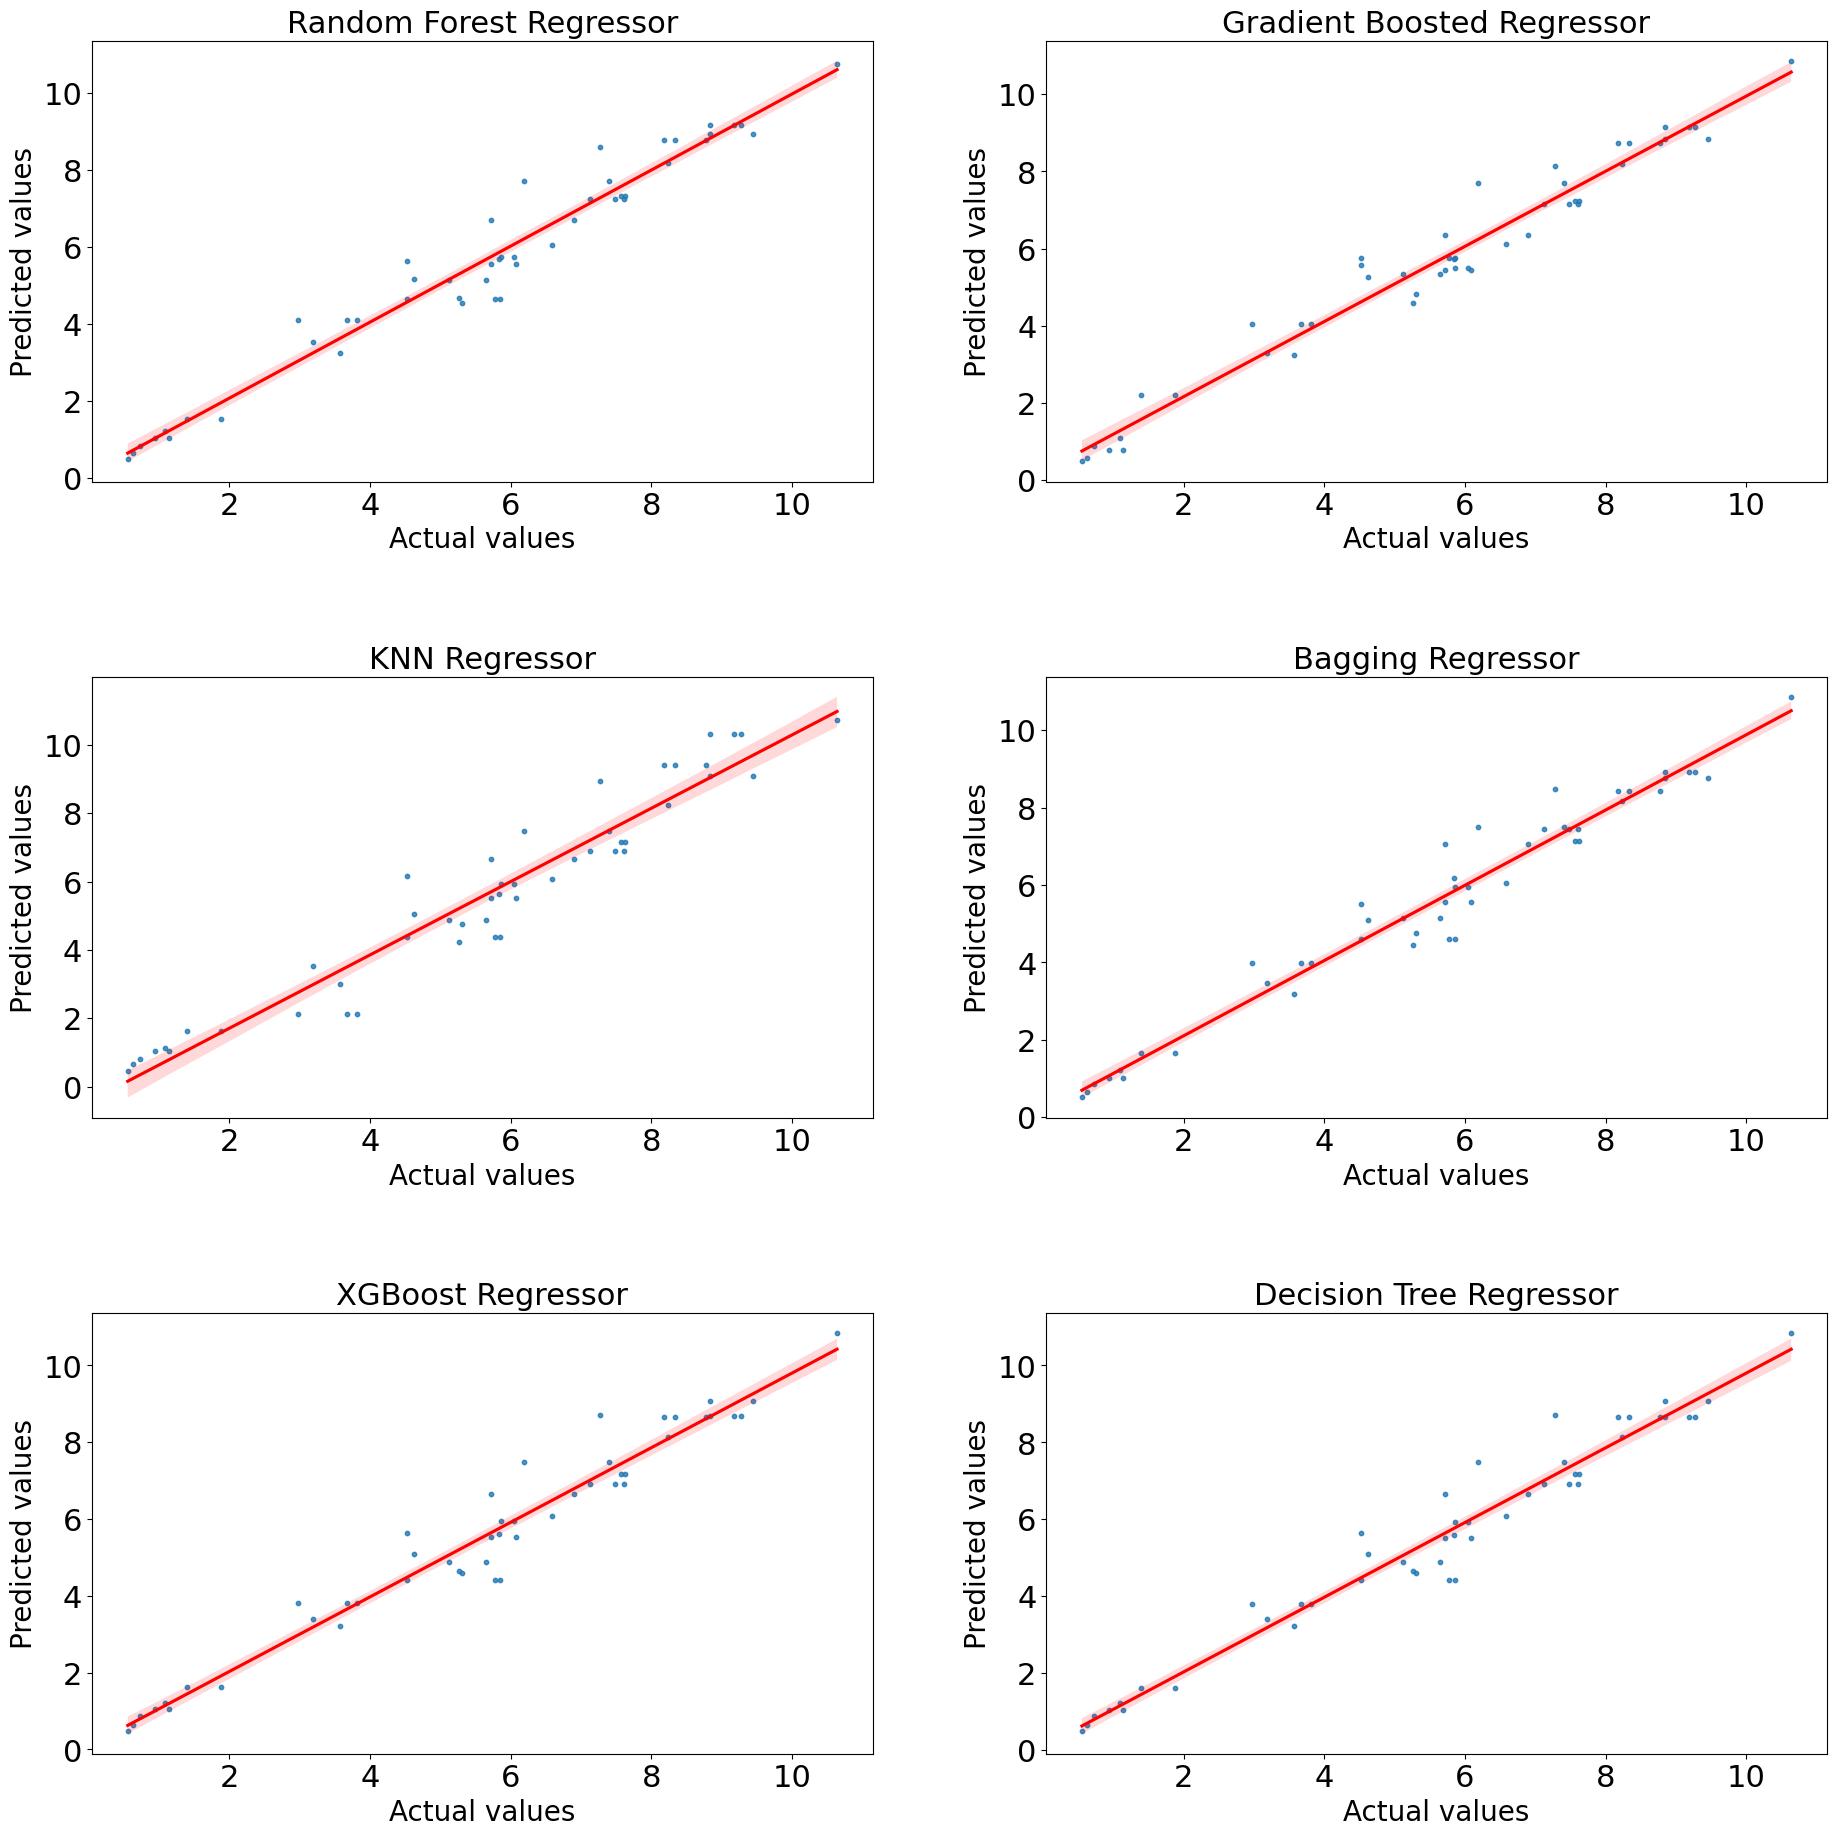

In [317]:
plt.clf()
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 3 Plots 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

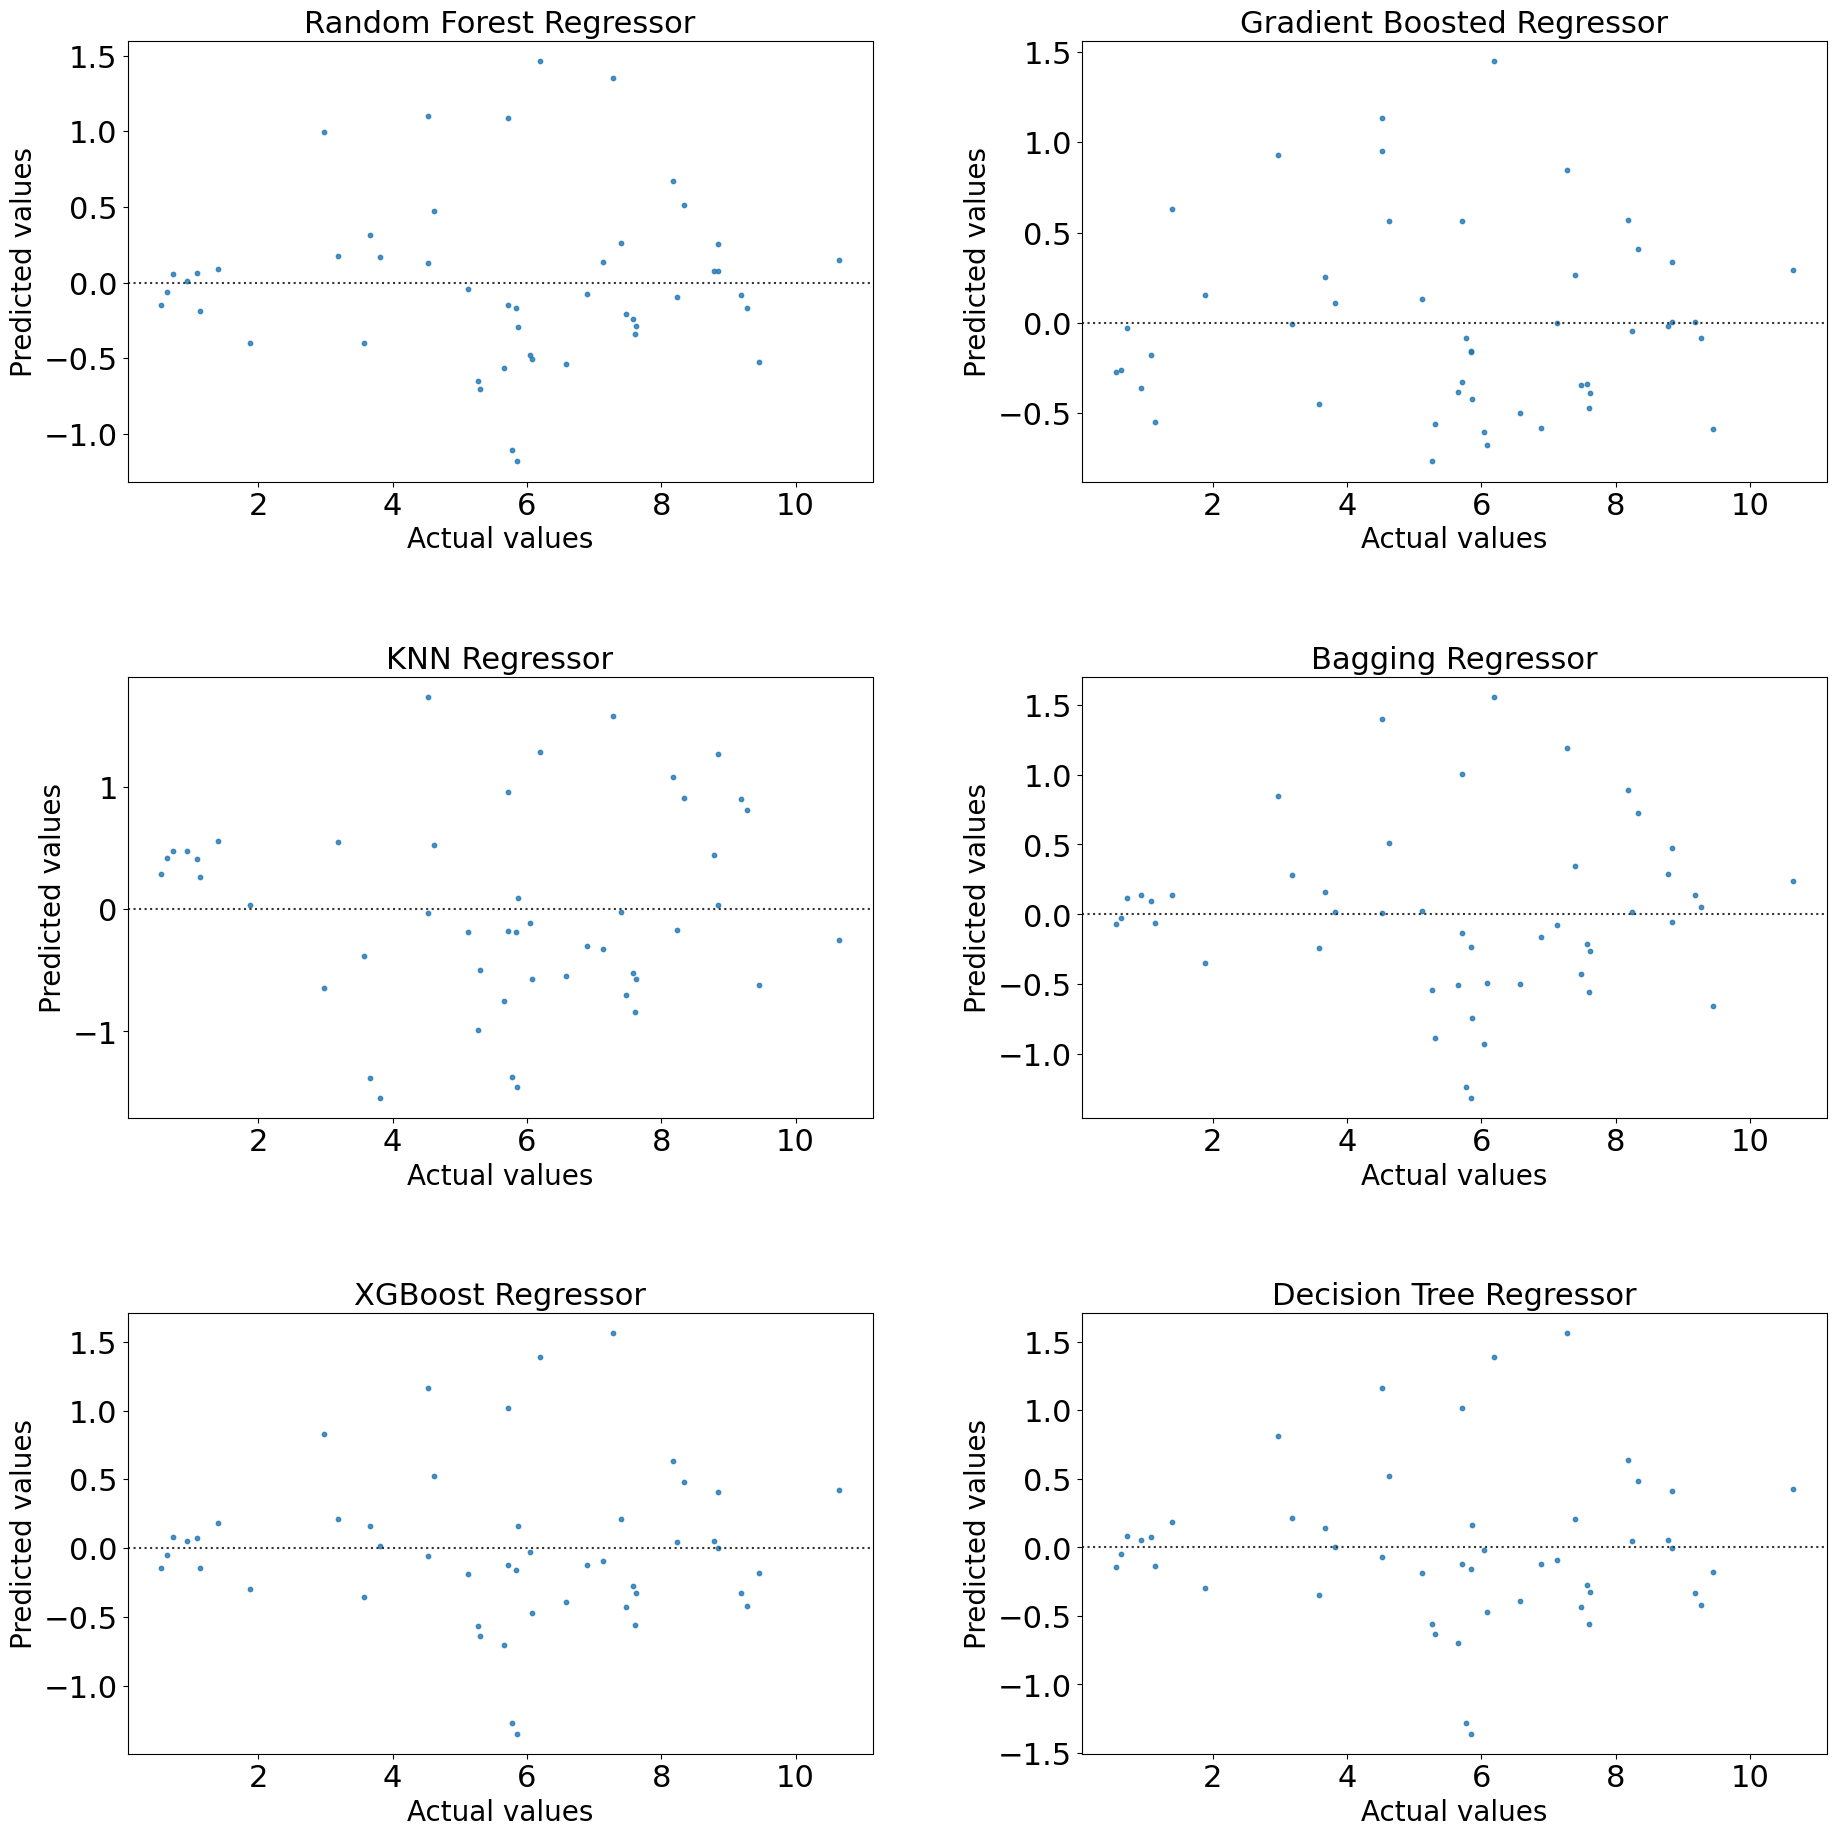

In [318]:
plt.clf()
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,0])
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].set_xlabel("Actual values")
ax[0,0].set_ylabel("Predicted values")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0,1])
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].set_xlabel("Actual values")
ax[0,1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,0])
ax[1,0].set_title("KNN Regressor")
ax[1,0].set_xlabel("Actual values")
ax[1,0].set_ylabel("Predicted values")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1,1])
ax[1,1].set_title("Bagging Regressor")
ax[1,1].set_xlabel("Actual values")
ax[1,1].set_ylabel("Predicted values")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,0])
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].set_xlabel("Actual values")
ax[2,0].set_ylabel("Predicted values")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2,1])
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].set_xlabel("Actual values")
ax[2,1].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 4 plot 

In [319]:
results

,Algorithm,accuracy
1,Random Forest,0.955148
2,Random Forest Regressor k_fold,0.972109
3,Gradient Boost Regressor,0.962540
4,Gradient Boost Regressor k fold,0.972785
5,Ada Boost Regressor,0.910255
6,Ada Boost Regressor k fold,0.916482
7,KNN Regressor,0.909130
8,KNN Regressor k fold,0.963584
9,Bagging Regressor,0.956218
10,Bagging Regressor k fold,0.972785


In [320]:
list(results["Algorithm"])

['Random Forest',
 'Random Forest Regressor k_fold',
 'Gradient Boost Regressor',
 'Gradient Boost Regressor k fold',
 'Ada Boost Regressor',
 'Ada Boost Regressor k fold',
 'KNN Regressor',
 'KNN Regressor k fold',
 'Bagging Regressor',
 'Bagging Regressor k fold',
 'Support Vector Regressor',
 'Support Vector Regressor k fold',
 'XGBoost Regressor',
 'XGBoost Regressor k_fold',
 'Decision Tree Regressor 1',
 'Decision Tree Regressor 1 k_fold',
 'Decision Tree Regressor 2',
 'Decision Tree Regressor 2 k_fold',
 'Pruned Decision Tree',
 'Pruned Decision Tree k_fold',
 'ANN Manually Tuned',
 'ANN:Scikit-Learn MLP',
 'ANN:Scikit-Learn MLP k_fold']

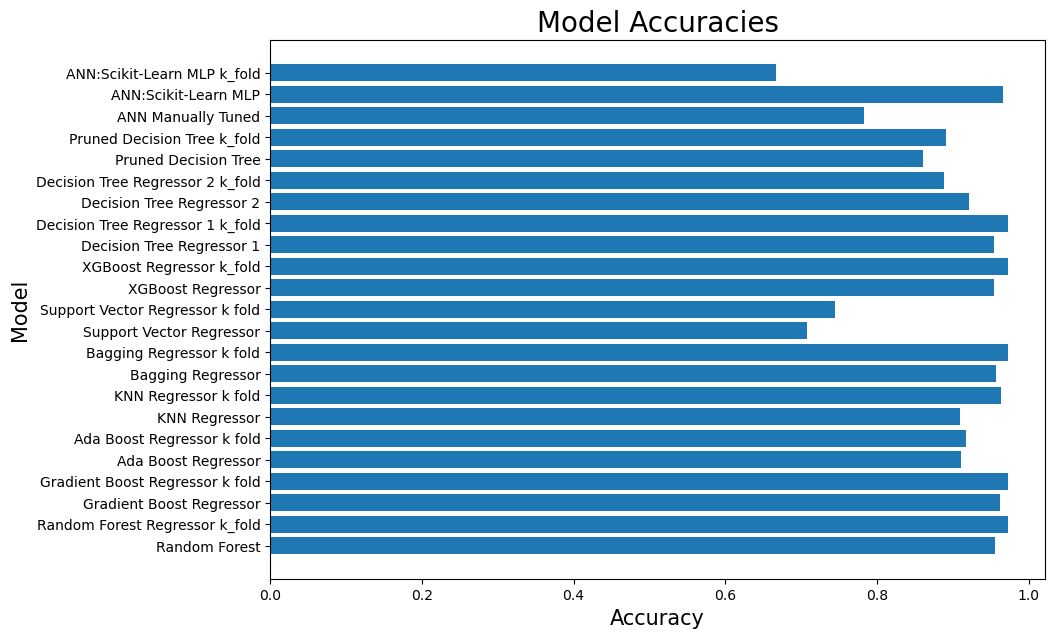

In [321]:
plt.rcdefaults()
models=list(results["Algorithm"])
scores=list(results["accuracy"])
plt.figure(figsize=(10,7))
plt.barh(models[:],scores[:])
plt.ylabel("Model",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.title("Model Accuracies",fontsize=20)
plt.xticklabels=results["Algorithm"]

## Type 5 Plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

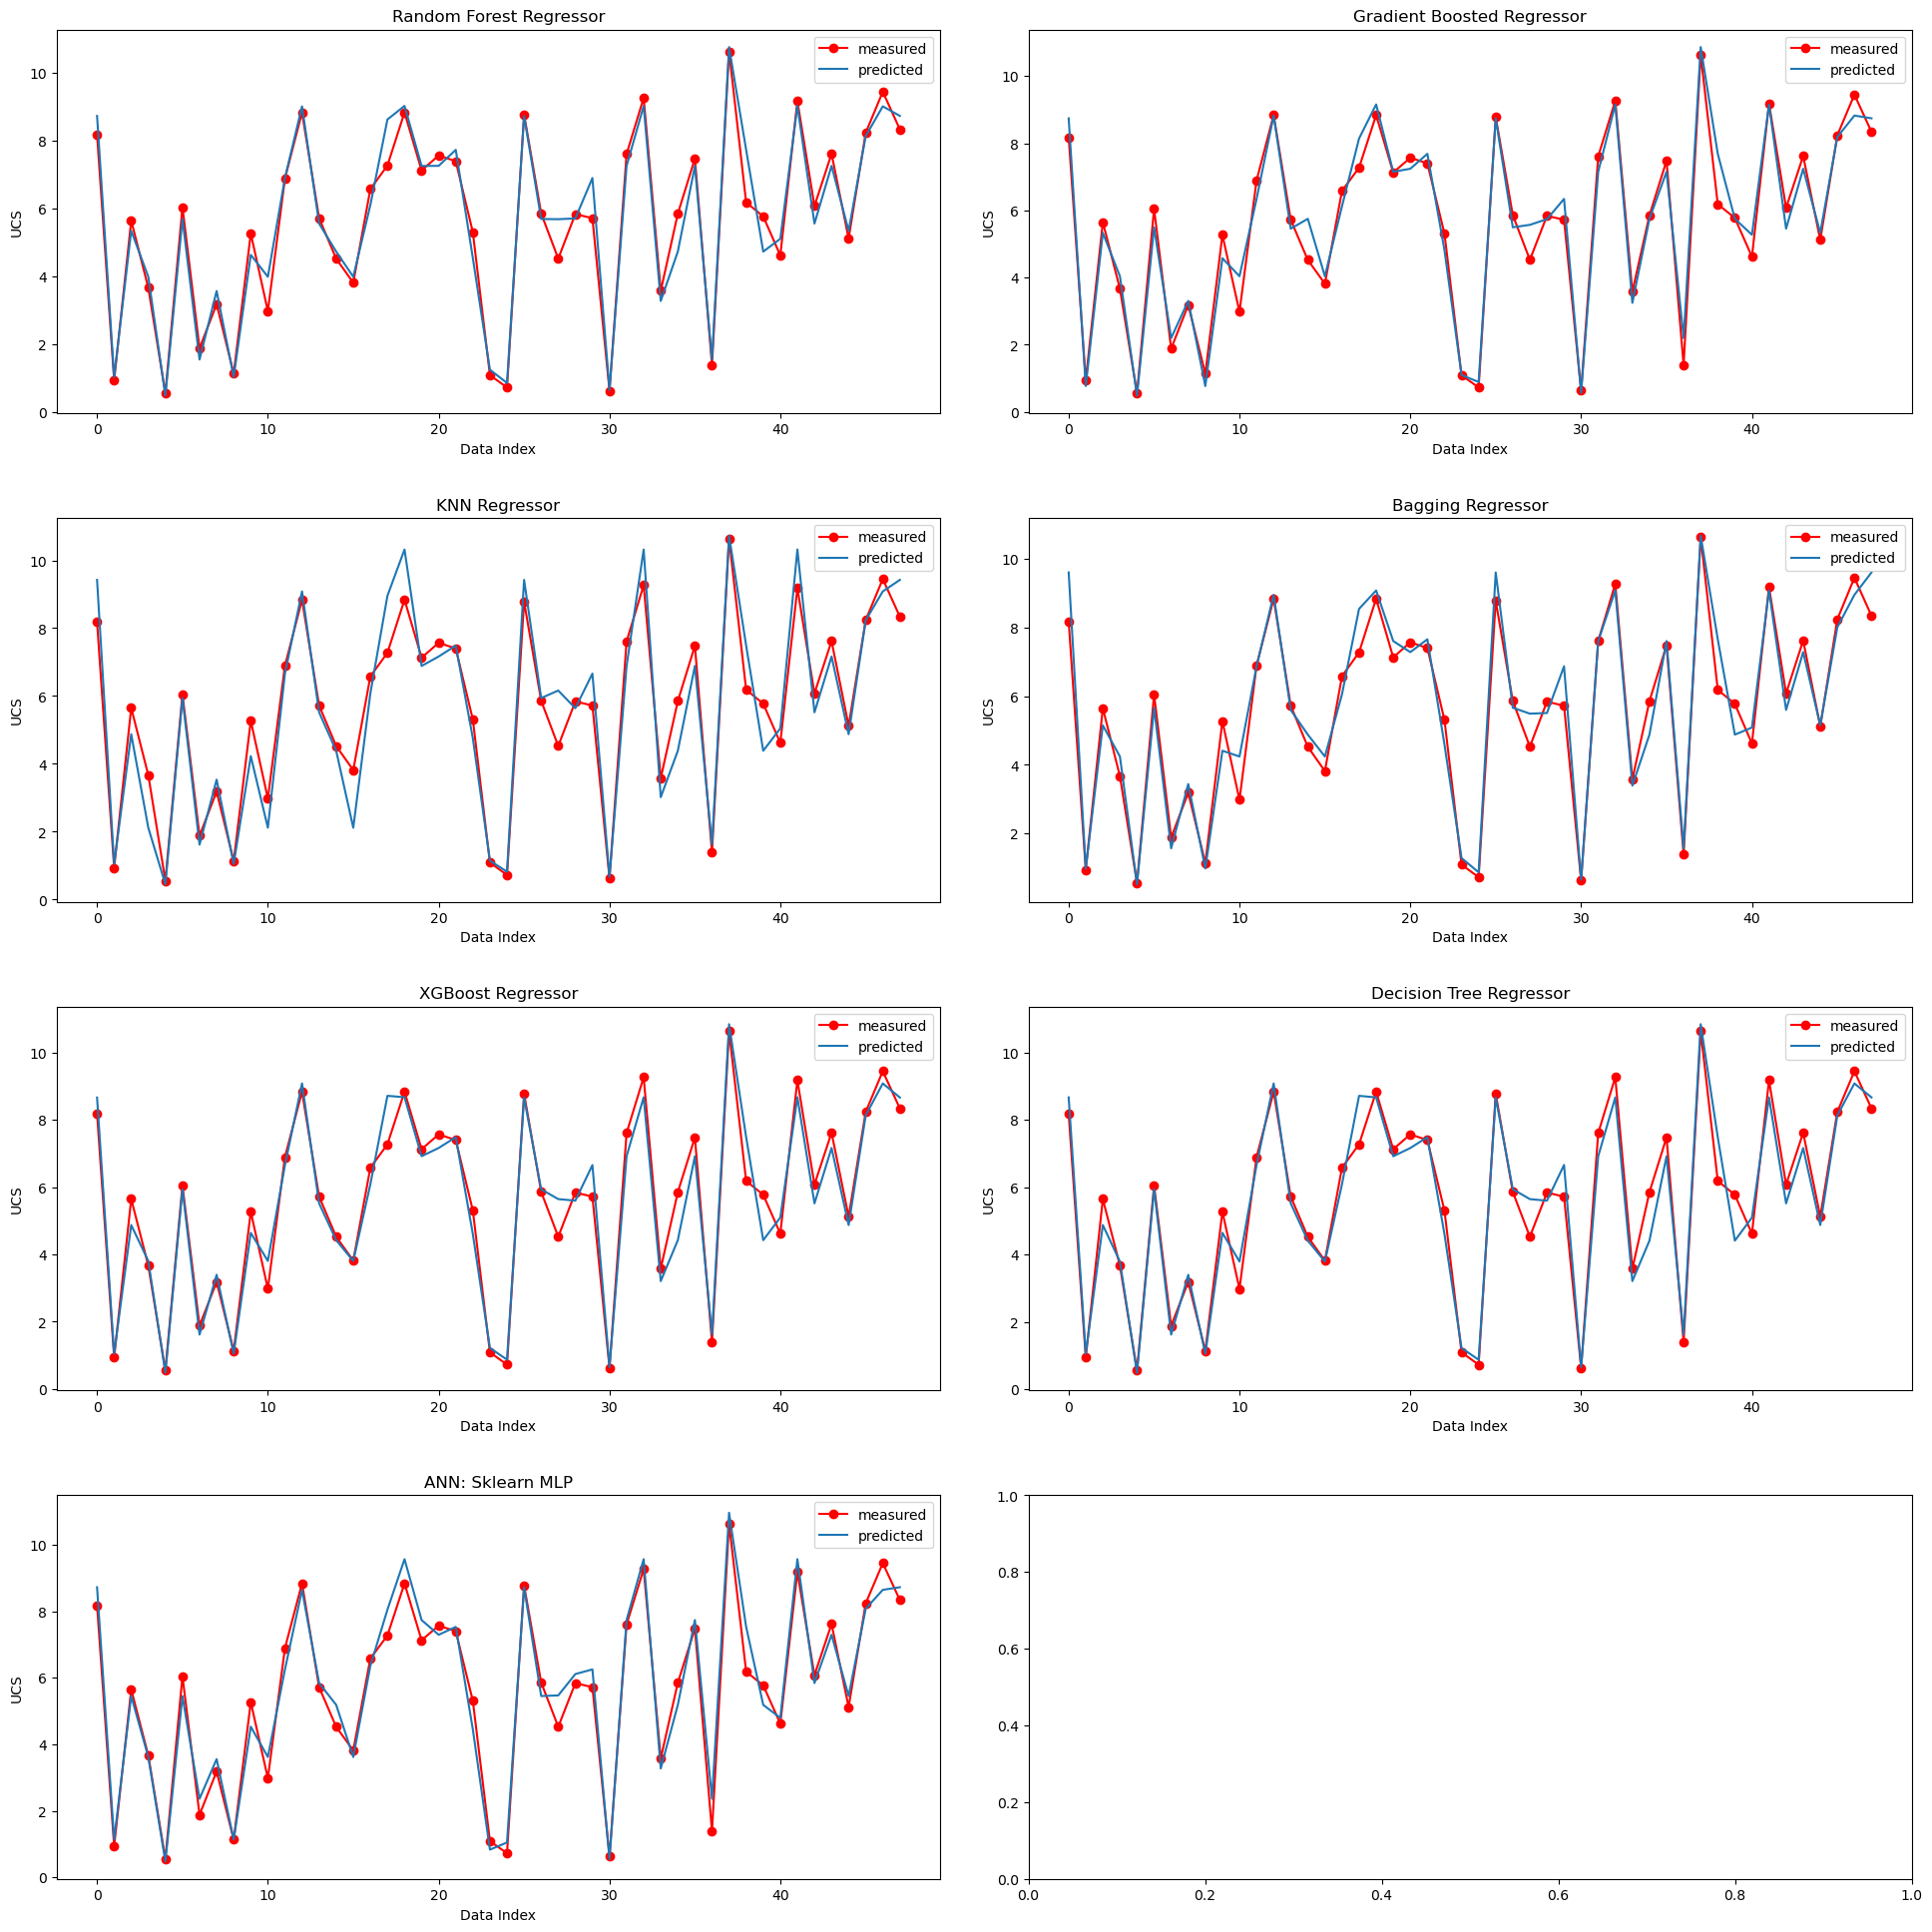

In [322]:
arr=np.arange(48)

plt.clf()
import seaborn as sns
fig,ax=plt.subplots(4,2,figsize=(20,20))

model1=RandomForestRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ax[0,0].set_title("Random Forest Regressor")
ax[0,0].plot(arr,y_test,"r-o",label="measured")
ax[0,0].plot(arr,y_pred,label="predicted")
ax[0,0].legend()
ax[0,0].set_xlabel("Data Index")
ax[0,0].set_ylabel("UCS")

model2=GradientBoostingRegressor()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
ax[0,1].set_title("Gradient Boosted Regressor")
ax[0,1].plot(arr,y_test,"r-o",label="measured")
ax[0,1].plot(arr,y_pred,label="predicted")
ax[0,1].legend()
ax[0,1].set_xlabel("Data Index")
ax[0,1].set_ylabel("UCS")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[1,0].set_title("KNN Regressor")
ax[1,0].plot(arr,y_test,"r-o",label="measured")
ax[1,0].plot(arr,y_pred,label="predicted")
ax[1,0].legend()
ax[1,0].set_xlabel("Data Index")
ax[1,0].set_ylabel("UCS")

model4=BaggingRegressor()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
ax[1,1].set_title("Bagging Regressor")
ax[1,1].plot(arr,y_test,"r-o",label="measured")
ax[1,1].plot(arr,y_pred,label="predicted")
ax[1,1].legend()
ax[1,1].set_xlabel("Data Index")
ax[1,1].set_ylabel("UCS")

model5=XGBRegressor()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
ax[2,0].set_title("XGBoost Regressor")
ax[2,0].plot(arr,y_test,"r-o",label="measured")
ax[2,0].plot(arr,y_pred,label="predicted")
ax[2,0].legend()
ax[2,0].set_xlabel("Data Index")
ax[2,0].set_ylabel("UCS")

model6=DecisionTreeRegressor()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
ax[2,1].set_title("Decision Tree Regressor")
ax[2,1].plot(arr,y_test,"r-o",label="measured")
ax[2,1].plot(arr,y_pred,label="predicted")
ax[2,1].legend()
ax[2,1].set_xlabel("Data Index")
ax[2,1].set_ylabel("UCS")

model7= MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=10000)
model7.fit(X_train, y_train)
y_pred=model7.predict(X_test)
ax[3,0].set_title("ANN: Sklearn MLP")
ax[3,0].plot(arr,y_test,"r-o",label="measured")
ax[3,0].plot(arr,y_pred,label="predicted")
ax[3,0].legend()
ax[3,0].set_xlabel("Data Index")
ax[3,0].set_ylabel("UCS")

fig.tight_layout(pad=3)